# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DatetimeIndex

In [2]:
path=("C:/Users/MSI/Desktop/Entrega_python_pandas_Nestor/")
df=pd.read_csv(path+"sample_NYC_parking_issues.csv",sep=";")
df.head
df.shape

(10000, 44)

### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [6]:
print(df.isnull().sum()) # para saber cuantos NAN hay por columan en el DF. Al haber tantas columans no permite visualizar bien

df.isnull().sum().sum() # Se suman todos los NAN que hay en el DF


Unnamed: 0                               0
Summons Number                           0
Plate ID                                 2
Registration State                       0
Plate Type                               0
Issue Date                               0
Violation Code                           0
Vehicle Body Type                      113
Vehicle Make                            82
Issuing Agency                           0
Street Code1                             0
Street Code2                             0
Street Code3                             0
Vehicle Expiration Date                  0
Violation Location                     727
Violation Precinct                       0
Issuer Precinct                          0
Issuer Code                              0
Issuer Command                         708
Issuer Squad                           708
Violation Time                           1
Time First Observed                   8903
Violation County                       760
Violation I

89671

In [7]:
print(df.isnull().sum().sum()) # Se suman todos los NAN que hay en el DF
df.columns[df.isnull().any()] # En qué columnas hay NAN

89671


Index(['Plate ID', 'Vehicle Body Type', 'Vehicle Make', 'Violation Location',
       'Issuer Command', 'Issuer Squad', 'Violation Time',
       'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'Number', 'Street',
       'Intersecting Street', 'Violation Legal Code',
       'Days Parking In Effect    ', 'From Hours In Effect',
       'To Hours In Effect', 'Vehicle Color', 'Unregistered Vehicle?',
       'Meter Number', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [8]:
df_sin_nan = df[[df.dropna]]
type(df_sin_nan)
# df_sin_nan.info()

# df_sin_nan.columns[df.isnull().any()]


KeyError: "None of [Index([<bound method DataFrame.dropna of       Unnamed: 0  Summons Number    Plate ID Registration State Plate Type  \\\\n0        7192124      7684215310     24824MD                 NY        COM   \\n1        1399831      5070680213    9TOPCLAS                 NY        OMT   \\n2        5369188      1356951855     GEL1573                 NY        PAS   \\n3        6338606      7713806271     EDU1026                 NY        PAS   \\n4        2823881      7645478044     DXX6460                 NY        PAS   \\n...          ...             ...         ...                ...        ...   \\n9995       51871      1359994981     42799JW                 NY        COM   \\n9996     2178598      7531580299  BLANKPLATE                 99        999   \\n9997     5536586      1353773541     FXW2962                 NY        PAS   \\n9998     1127482      7207594008     CLR2162                 NY        PAS   \\n9999     2822344      7536561775     DJG9703                 NY        PAS   \\n\\n      Issue Date  Violation Code Vehicle Body Type Vehicle Make  \\\\n0     04/23/2014              71               VAN         FRIG   \\n1     09/14/2013               7              4DSD        DODGE   \\n2     02/13/2014              71              SUBN        HONDA   \\n3     03/20/2014              21              SUBN        TOYOT   \\n4     11/01/2013              20              4DSD        HONDA   \\n...          ...             ...               ...          ...   \\n9995  07/24/2013              14               VAN          FRG   \\n9996  10/10/2013              21               MCY        TRIUM   \\n9997  02/21/2014              16               SDN        MAZDA   \\n9998  09/05/2013              37              4DSD        HONDA   \\n9999  11/01/2013              46              SUBN        HONDA   \\n\\n     Issuing Agency  ...  Vehicle Color  Unregistered Vehicle?  Vehicle Year  \\\\n0                 T  ...             WH                    NaN        2004.0   \\n1                 V  ...             BK                    NaN        2008.0   \\n2                 P  ...            NaN                    0.0        2006.0   \\n3                 T  ...             GY                    NaN        2008.0   \\n4                 T  ...             MR                    NaN        1996.0   \\n...             ...  ...            ...                    ...           ...   \\n9995              P  ...           WHIT                    0.0        2007.0   \\n9996              T  ...          BLACK                    NaN           0.0   \\n9997              T  ...             GR                    0.0        1996.0   \\n9998              T  ...          SILVE                    NaN        2006.0   \\n9999              T  ...          BLACK                    NaN        2005.0   \\n\\n      Meter Number  Feet From Curb  Violation Post Code  \\\\n0              NaN             0.0                 01 4   \\n1              NaN             0.0                  NaN   \\n2                -             0.0                  NaN   \\n3              NaN             0.0                 14 4   \\n4              NaN             0.0                 03-A   \\n...            ...             ...                  ...   \\n9995             -             0.0                  NaN   \\n9996           NaN             0.0                 01 -   \\n9997             -             0.0                  NaN   \\n9998      495-0067             0.0                 52-P   \\n9999           NaN             0.0                 06 -   \\n\\n               Violation Description  No Standing or Stopping Violation  \\\\n0     71A-Insp Sticker Expired (NYS)                                NaN   \\n1       FAILURE TO STOP AT RED LIGHT                                NaN   \\n2                                NaN                                NaN   \\n3       21-No Parking (street clean)                                NaN   \\n4           20A-No Parking (Non-COM)                                NaN   \\n...                              ...                                ...   \\n9995                             NaN                                NaN   \\n9996    21-No Parking (street clean)                                NaN   \\n9997                             NaN                                NaN   \\n9998           37-Expired Muni Meter                                NaN   \\n9999    46A-Double Parking (Non-COM)                                NaN   \\n\\n     Hydrant Violation Double Parking Violation  \\n0                  NaN                      NaN  \\n1                  NaN                      NaN  \\n2                  NaN                      NaN  \\n3                  NaN                      NaN  \\n4                  NaN                      NaN  \\n...                ...                      ...  \\n9995               NaN                      NaN  \\n9996               NaN                      NaN  \\n9997               NaN                      NaN  \\n9998               NaN                      NaN  \\n9999               NaN                      NaN  \\n\\n[10000 rows x 44 columns]>], dtype='object')] are in the [columns]"

In [ ]:
col_nan=df.columns[df.isnull().any()]
df[col_nan].isnull().sum()
print(df[df.isnull().any(axis=1)][col_nan].head())

   Plate ID Vehicle Body Type Vehicle Make  Violation Location Issuer Command  \
0   24824MD               VAN         FRIG               109.0           T401   
1  9TOPCLAS              4DSD        DODGE                 NaN            NaN   
2   GEL1573              SUBN        HONDA                33.0           0033   
3   EDU1026              SUBN        TOYOT               103.0           T402   
4   DXX6460              4DSD        HONDA               109.0           T401   

  Issuer Squad Violation Time Time First Observed Violation County  \
0            C          0508P                 NaN                Q   
1          NaN          1129P                 NaN              NaN   
2         0000          0503P                 NaN               NY   
3            H          1232P                 NaN                Q   
4            N          1134A                 NaN                Q   

  Violation In Front Of Or Opposite  ... From Hours In Effect  \
0                          

In [ ]:
# df1=df

# df1.dropna(axis=1,inplace=True)

# print(df1.isnull().sum().sum())

# print(df.shape) # ahora solo hay 19 columnas, no ha sido buena idea
# df1



0


(10000, 19)

In [ ]:
df2=df
df3=df2.drop(["Double Parking Violation","Hydrant Violation","No Standing or Stopping Violation"],axis=1)
print(df3.shape)

col_nan3=df3.columns[df3.isnull().any()]
col_nan3

# He eliminado las 3 columnas con los 10.000 Nan que tenián por fila

(10000, 41)


Index(['Plate ID', 'Vehicle Body Type', 'Vehicle Make', 'Violation Location',
       'Issuer Command', 'Issuer Squad', 'Violation Time',
       'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'Number', 'Street',
       'Intersecting Street', 'Violation Legal Code',
       'Days Parking In Effect    ', 'From Hours In Effect',
       'To Hours In Effect', 'Vehicle Color', 'Unregistered Vehicle?',
       'Meter Number', 'Violation Post Code', 'Violation Description'],
      dtype='object')

In [ ]:
df4=df3[["Plate ID"]]
df4
# Busca las filas con los NaN 

df4.isnull().sum()
print(df4[df4.isnull().any(axis=1)].head()) # Aquí las filas con NaN

print(df["Registration State"].value_counts()) # miro los diferentes estados registrados y donde hay más

print(len(df["Registration State"].value_counts())) # miro el numero de tipos únicos de estados registrados

df.loc[(650,3087),] # miro cuantos NaN tienen estas filas en todo el DataFrame Original
df.loc[(648,647,649,3087),]

     Plate ID
650       NaN
3087      NaN
Registration State
NY    7670
NJ     951
PA     260
CT     164
FL     137
MA      91
VA      73
MD      58
NC      55
IN      51
99      47
GA      37
AZ      34
IL      30
TX      29
SC      27
DE      25
OH      25
TN      22
OK      21
ME      20
MI      19
CA      18
RI      17
MN      16
NH      13
QB      12
AL      10
VT       9
MO       6
DP       6
KY       5
ON       5
ID       4
WI       4
MS       4
IA       4
UT       2
DC       2
CO       2
OR       2
NE       2
WV       2
NV       2
GV       1
LA       1
KS       1
WA       1
ND       1
NM       1
AR       1
Name: count, dtype: int64
51


Unnamed: 0  Summons Number Plate ID Registration State Plate Type  \
648       210494      7658931111  EEA6979                 NY        PAS   
647      3044796      7980897500   7A0387                 MI        PAS   
649      8103058      7094175954  61261MA                 NY        COM   
3087      771256      7475839151      NaN                 NY        PAS   

      Issue Date  Violation Code Vehicle Body Type Vehicle Make  \
648   08/01/2013              21              SUBN         JEEP   
647   11/09/2013              21              PICK        CHEVR   
649   05/20/2014              38              DELV        INTER   
3087  08/23/2013              74              SUBN        NISSA   

     Issuing Agency  ...  Vehicle Color  Unregistered Vehicle?  Vehicle Year  \
648               T  ...           GREY                    NaN        1998.0   
647               T  ...          BLACK                    NaN           0.0   
649               T  ...          BROWN                    NaN        1997.0   
3087              T  ...           BLUE                    NaN           0.0   

      Meter Number  Feet From Curb  Violation Post Code  \
648            NaN             0.0                 41 -   
647            NaN             0.0                  B -   
649            NaN             0.0                 19 4   
3087           NaN             0.0                  K -   

               Violation Description  No Standing or Stopping Violation  \
648     21-No Parking (street clean)                                NaN   
647     21-No Parking (street clean)                                NaN   
649   38-Failure to Display Muni Rec                                NaN   
3087        74-Missing Display Plate                                NaN   

     Hydrant Violation Double Parking Violation  
648                NaN                      NaN  
647                NaN                      NaN  
649                NaN                      NaN  
3087               NaN                      NaN  

[4 rows x 44 columns]

In [ ]:
print(len(df["Registration State"].value_counts())) # miro el numero de tipos únicos de estados registrados



51


In [ ]:
df5=df4.fillna(0)
df5.fillna(0,inplace=True)
df5.shape

print(len(df.value_counts())) # miro el numero de tipos únicos de estados registrados
df5


len(df5["Plate ID"].value_counts())


0


9805

In [ ]:
len(df["Plate ID"].value_counts()) # miro los diferentes estados registrados y donde hay más

# print(len(df["Registration State"].value_counts())) # miro el numero de tipos únicos de estados registrados


9804

### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [ ]:
df3=df
# print(df3[["Vehicle Year"]][df3["Vehicle Year"]>0])

df3['Vehicle Year'] = df3['Vehicle Year'].astype('int64') # Parece de 1 solo uso y se integra en df3 ya en integer

df3['Vehicle Year'].dtype

# print(df3["Vehicle Make"]).count

# df3[df3['Vehicle Year']!= 0]

# df3

pd.set_option('display.max_rows', 10)

df3[df3['Vehicle Year']!= 0]


# df3['Vehicle Year'] = df3[["Vehicle Year"]][df3["Vehicle Year"]>0]

# df3["Vehicle Year"]=df3['Vehicle Year']!= 0 # Lo deja en booleano TRUE or False





0       2004
1       2008
2       2006
3       2008
4       1996
        ... 
9994    2005
9995    2007
9997    1996
9998    2006
9999    2005
Name: Vehicle Year, Length: 7307, dtype: int64

In [42]:

df3['Vehicle Year'] = df3['Vehicle Year'].astype('int64') # Parece de 1 solo uso y se integra en df3 ya en integer

df3['Vehicle Year'].dtype

zasca=df3.drop(df3[df3["Vehicle Year"]<=0].index,inplace=False)

pd.set_option('display.max_rows', 10)

zasca[["Vehicle Year"]]
zasca["Vehicle Year"]


0       2004
1       2008
2       2006
3       2008
4       1996
        ... 
9994    2005
9995    2007
9997    1996
9998    2006
9999    2005
Name: Vehicle Year, Length: 7307, dtype: int64

Unnamed: 0  Summons Number    Plate ID Registration State Plate Type  \
9        3744640      1354201978      UGH50V                 NJ        PAS   
18       5444793      1358908114     22079MD                 NY        COM   
20       8301157      7190766972     PO9928A                 GA        PAS   
23       7426768      1365850470    12441668                 GA        PAS   
24        162020      7911074719      L10417                 CT        CMB   
25        244472      7512329362     DJR2200                 NY        PAS   
30       7981896      7805562295     FEC3310                 NY        PAS   
31       3070299      1362366353      XY829Y                 NJ        PAS   
33        386128      7238235353     R445658                 IL        PAS   
35       7416165      7833874449     33697PC                 NY        IRP   
37       1815935      7271591989      W58DFR                 NJ        PAS   
38       9018901      7909567789      NB567Y                 NJ        PAS   
41        998143      1341436135      KTJ237                 MS        PAS   
44       5044696      7047753795     21628BB                 NY        OMR   
46       8410911      7380644634     CJG8626                 NY        PAS   
58       8195559      7187890254     JDN6369                 PA        PAS   
60       5289597      5072694409     CTL6361                 NY        PAS   
72       4225382      7029555480     JLK9536                 PA        PAS   
79       3835100      7000623093     CLN0347                 DP        PAS   
80       3133792      7127175160     53556JM                 NY        COM   
83       9039192      7095575496      ZTX68Z                 NJ        PAS   
85       2972194      7875575590      XX231W                 NJ        PAS   
86       3692186      7058950271      W85APP                 NJ        PAS   
88       7456672      1370488129      BHKD43                 FL        PAS   
89       4310368      7776171669     2028130                 IN        PAS   
90       2370973      7153595211      XX657F                 NJ        PAS   
92       6743766      7138321144     GEP8424                 NY        PAS   
95       3358705      7998740322      W93AGT                 NJ        PAS   
105      7821905      7099570110      U44BNP                 NJ        PAS   
130      4901635      1354351587      6895BK                 NM        PAS   
132      2264757      7186709400     FAS9993                 OH        PAS   
143      4267279      7987797911     ZCS0926                 PA        PAS   
148      4936845      5071991858      PSCH53                 NY        SRF   
149      5736781      1364975385     DVA5166                 NY        PAS   
151      2381269      7003308850     3123575                 NH        PAS   
152      4328926      7683500161      W47DHT                 NJ        PAS   
154      6792050      7473449643     GKX4741                 NY        PAS   
164      3959082      7013277617     66163PA                 NY        COM   
165       647515      7712644044     GAR2818                 NY        PAS   
167      6397543      7977391776      T47BLV                 NJ        PAS   
170      5481848      7366444777      T45CFS                 NJ        PAS   
172      5630857      7127197222     15711PC                 NY        IRP   
173      5188038      7502965385     GKE7468                 NY        PAS   
180       505824      1357974504     AE71537                 AZ        PAS   
184      1916108      7713773230      D27CHU                 NJ        PAS   
185      2836618      7570378179      446YAG                 CT        PAS   
187      6219163      7704765176        TZ35                 CT        999   
190      2204650      7029509997     2MGU046                 CA        PAS   
191      4842841      7772104029     21162BB                 NY        OMR   
193      3490137      7513427008      S16039                 FL        PAS   
194      2368980      706982

### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [55]:
#  se me ocurre rollo value cont antes vs despues y se vera cunatas había y cuantas he elminado

pd.set_option("display.max_rows", None) 
# print(df["Vehicle Make"].value_counts())

df["Vehicle Make"].nunique() # Cuantas Marcas de coche hay en total antes de eliminarlas


# sas=pd.DataFrame(df[["Vehicle Make"]].count()) # con el count solo consigues la suma total de las apariaciones de los valores
# type(sas)
# sas

ras=(df[["Vehicle Make"]].value_counts()) # asi es una serie --> para que sea una DF // 
# pd.DataFrame(ras) # asi no hace nada
ras=pd.DataFrame(ras) # Asi se convierte en Data Frame asi se convierte en DF
type(ras)
# ras

mas=pd.DataFrame(df[["Vehicle Make"]].value_counts())
mas.count()

mas

# mas[mas[["count"]]>1] # muestra los mayores que 2, NaN si son menores que 2

# mas[mas[["count"]]>=2].dropna().count() # Quito los NaN

# mas[mas[["count"]]>=2].dropna().count() # Cuento cuantas hay ahora tras quitar NaN

# mas.count()-mas[mas[["count"]]>=2].dropna().count() # he quitado 45 marcas de coches, como resultado
# mas[mas[["count"]]<=1].dropna() # aqui la lista de valores quitados
# # VL nada
# # W nada


count
Vehicle Make       
FORD           1402
TOYOT           910
HONDA           869
CHEVR           836
NISSA           761
GMC             368
ME/BE           342
DODGE           342
FRUEH           331
INTER           304
BMW             301
JEEP            243
HYUND           227
LEXUS           203
VOLKS           170
ACURA           169
CHRYS           154
LINCO           149
MITSU           126
NS/OT           124
INFIN           118
ISUZU           115
SUBAR           113
AUDI            109
MAZDA           101
VOLVO            96
MERCU            95
CADIL            94
KIA              75
HINO             73
ROVER            54
WORKH            44
MACK             40
PONTI            33
BUICK            32
PETER            29
KENWO            27
UD               26
SATUR            24
JAGUA            21
PORSC            19
MINI             18
SAAB             16
STERL            14
PLYMO            11
SCION            10
SUZUK            10
VAN H             9
VESPA             9
UTIL              9
WORK              8
FR/LI             8
FIAT              7
OLDSM             7
SMART             7
HUMME             7
MI/F              7
HARLE             4
TRAIL             4
FREI              4
SMITH             3
CHECK             3
MCI               3
WHITE             3
KAWAS             3
UTILI             2
TRLR              2
TRIUM             2
STARC             2
STAR              2
FONTA             2
KW                2
WO/C              2
BL/B              2
PREVO             2
UPS               1
WOR               1
SZI               1
W                 1
WANC              1
THD               1
BENTL             1
VOLU              1
TEAMA             1
VOK               1
VL                1
VAN               1
UTITY             1
FUSO              1
PRATT             1
STUDE             1
SPRI              1
GEO               1
GIDNY             1
FRIG              1
GREAT             1
HERCU             1
FRGHT             1
FRG               1
ICENE             1
FR/L              1
FR L              1
KENW              1
KRYS              1
LEXCO             1
LIMO              1
MASSA             1
FERRA             1
EAST              1
AMC               1
DATSU             1
N/S               1
NAVIS             1
CHEET             1
GEM               1
PREV              1
PUTEL             1
RNG R             1
SOLEC             1
YAMAH             1

In [5]:
# zasca=df44.drop(df44[df44["Vehicle Mark"].value_counts()<=1)].index,inplace=False)

# zasca["Vehicle Year"]

df44=df

pd.set_option('display.max_rows', 10)

# zasca2=df44.drop(df44[(df44["Vehicle Mark"].value_counts())<=0].index,inplace=False)
# zasca2["Vehicle Mark"]

df44[df44["Vehicle Year"]<=0].head()



Unnamed: 0  Summons Number  Plate ID Registration State Plate Type  \
9      3744640      1354201978    UGH50V                 NJ        PAS   
18     5444793      1358908114   22079MD                 NY        COM   
20     8301157      7190766972   PO9928A                 GA        PAS   
23     7426768      1365850470  12441668                 GA        PAS   
24      162020      7911074719    L10417                 CT        CMB   

    Issue Date  Violation Code Vehicle Body Type Vehicle Make Issuing Agency  \
9   01/08/2014              14               VAN          BMW              P   
18  02/18/2014              18              DELV        ISUZU              P   
20  05/28/2014              38              4DSD         SAAB              T   
23  04/12/2014              40               VAN        PLYMO              P   
24  07/31/2013              42               VAN         FORD              T   

    ...  Vehicle Color  Unregistered Vehicle?  Vehicle Year  Meter Number  \
9   ...             GD                    0.0           0.0             -   
18  ...             WT                    0.0           0.0             -   
20  ...           BLUE                    NaN           0.0           NaN   
23  ...           GRAY                    0.0           0.0             -   
24  ...          YELLO                    NaN           0.0      143-5594   

    Feet From Curb  Violation Post Code           Violation Description  \
9              0.0                  NaN                             NaN   
18             0.0                  NaN                             NaN   
20             0.0                 57-P  38-Failure to Display Muni Rec   
23             0.0                  NaN                             NaN   
24             0.0                 33 -  42-Exp. Muni-Mtr (Com. Mtr. Z)   

    No Standing or Stopping Violation Hydrant Violation  \
9                                 NaN               NaN   
18                                NaN               NaN   
20                                NaN               NaN   
23                                NaN               NaN   
24                                NaN               NaN   

   Double Parking Violation  
9                       NaN  
18                      NaN  
20                      NaN  
23                      NaN  
24                      NaN  

[5 rows x 44 columns]

In [108]:
mas=pd.DataFrame(df[["Vehicle Make"]].value_counts())
mas.count()

mas[mas[["count"]]>=2].dropna().count() # Cuento cuantas hay ahora tras quitar NaN


# df44["Vehicle Make"]=mas[mas[["count"]]>=2].dropna().count() 

# df44["Vehicle Make"]

count    75
dtype: int64

In [ ]:

# df44.groupby("")

# df44[["Vehicle Make"]][(df.Vehicle Make)>0].value_counts()

# print(df[["Vehicle Make"]][(df["Vehicle Make"] > 0)].value_counts())

print(df[["Vehicle Make"]][(df["Vehicle Make"].value_counts())]> 0)


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (420812731.py, line 7)

In [152]:
# print((df44[["Vehicle Make"]][(df44["Vehicle Make"] > 0)].resample('Y').nunique())) # el 0 sale como valor, pero hay que quitarlo porque significa que no ha nevado
print((df44[["Vehicle Make"]][(df44["Vehicle Make"].value_counts(>0))])) # el 0 sale como valor, pero hay que quitarlo porque significa que no ha nevado


SyntaxError: invalid syntax (273565415.py, line 2)

In [157]:
df.groupby('Vehicle Make').value_counts().reset_index()

Empty DataFrame
Columns: [Vehicle Make, Unnamed: 0, Summons Number, Plate ID, Registration State, Plate Type, Issue Date, Violation Code, Vehicle Body Type, Issuing Agency, Street Code1, Street Code2, Street Code3, Vehicle Expiration Date, Violation Location, Violation Precinct, Issuer Precinct, Issuer Code, Issuer Command, Issuer Squad, Violation Time, Time First Observed, Violation County, Violation In Front Of Or Opposite, Number, Street, Intersecting Street, Date First Observed, Law Section, Sub Division, Violation Legal Code, Days Parking In Effect    , From Hours In Effect, To Hours In Effect, Vehicle Color, Unregistered Vehicle?, Vehicle Year, Meter Number, Feet From Curb, Violation Post Code, Violation Description, No Standing or Stopping Violation, Hydrant Violation, Double Parking Violation, count]
Index: []

[0 rows x 45 columns]

In [166]:

# Example 4: Using DataFrame.size() and max()
df222 = df44.groupby(['Vehicle Year',]).size().groupby(level=0).max()

print(df222)

df44.groupby(['Vehicle Year',]).count().head()

# df44.groupby(['Vehicle Year',]).count().filter

Vehicle Year
0.0       2693
1980.0       1
1982.0       3
1983.0       2
1984.0       4
1985.0       9
1986.0      15
1987.0      24
1988.0      31
1989.0      21
1990.0      21
1991.0       9
1992.0      24
1993.0      28
1994.0      49
1995.0      96
1996.0      94
1997.0     141
1998.0     154
1999.0     203
2001.0     289
2002.0     335
2003.0     341
2004.0     396
2005.0     410
2006.0     459
2007.0     533
2008.0     472
2009.0     360
2010.0     431
2011.0     546
2012.0     682
2013.0     848
2014.0     271
2015.0       4
2069.0       1
dtype: int64


AttributeError: 'NoneType' object has no attribute 'head'

#### La solucion

In [212]:

# Decido eliminar aquellas marcas que solo aparecen 1 vez tras el conteo de las marcas de vehículos
df20 = pd.DataFrame(df44['Vehicle Make'].groupby(df44['Vehicle Make']).filter(lambda x: len(x) > 1).value_counts())


df21 = df44['Vehicle Make'].groupby(df44['Vehicle Make']).filter(lambda x: len(x) == 1).value_counts()

type(df20)
type(df21)

df20
df21




Vehicle Make
FRIG     1
VAN      1
VOLU     1
LIMO     1
KENW     1
        ..
THD      1
GEM      1
MASSA    1
VOK      1
FRG      1
Name: count, Length: 45, dtype: int64

Series([], Name: count, dtype: int64)

### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600')])

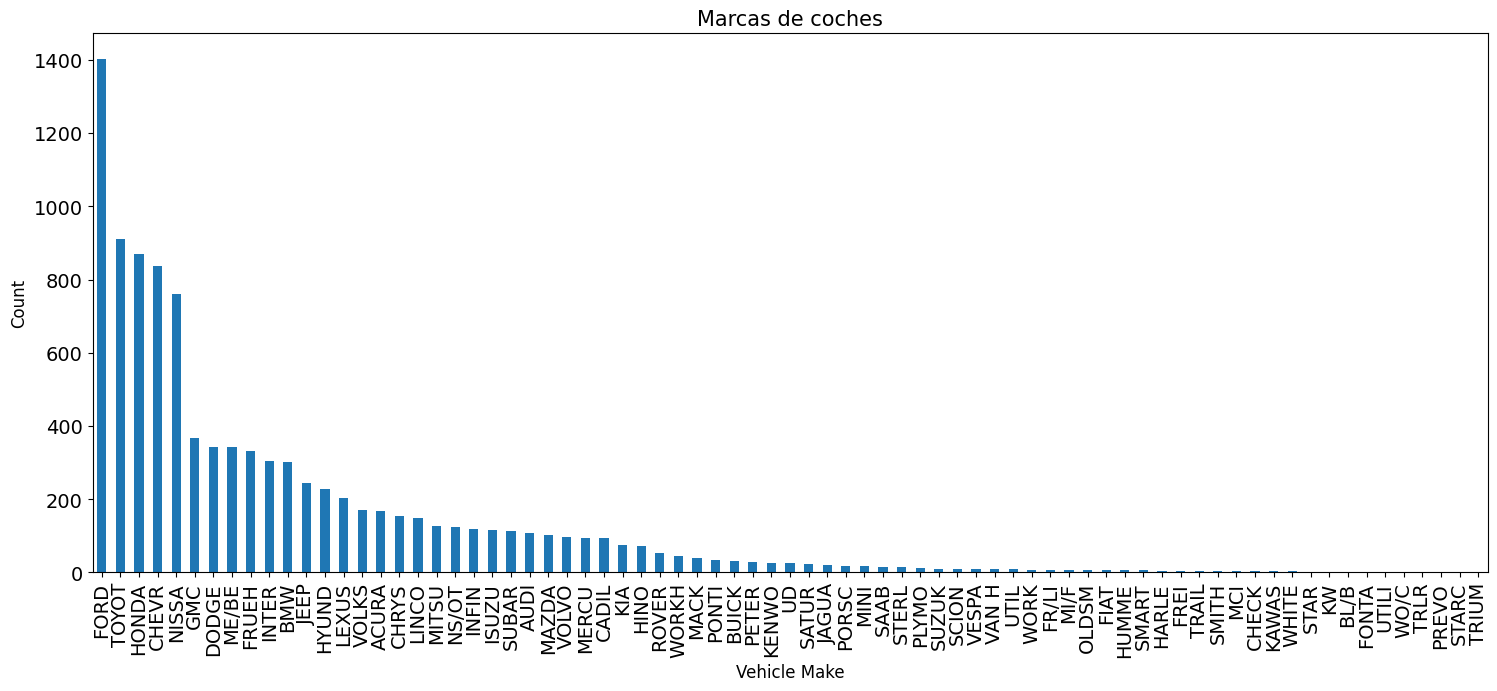

In [ ]:
fig = plt.subplots(figsize=(18, 7))
df20 = df44['Vehicle Make'].groupby(df44['Vehicle Make']).filter(lambda x: len(x) > 1).value_counts().plot(kind='bar')
plt.title("Marcas de coches",fontsize=15)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Vehicle Make',fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [4]:
sns.barplot(data=df20, x="Vehicle Make")
sns.set_theme(style='white', font_scale=0)



NameError: name 'df20' is not defined

<Axes: xlabel='Vehicle Make', ylabel='Count'>

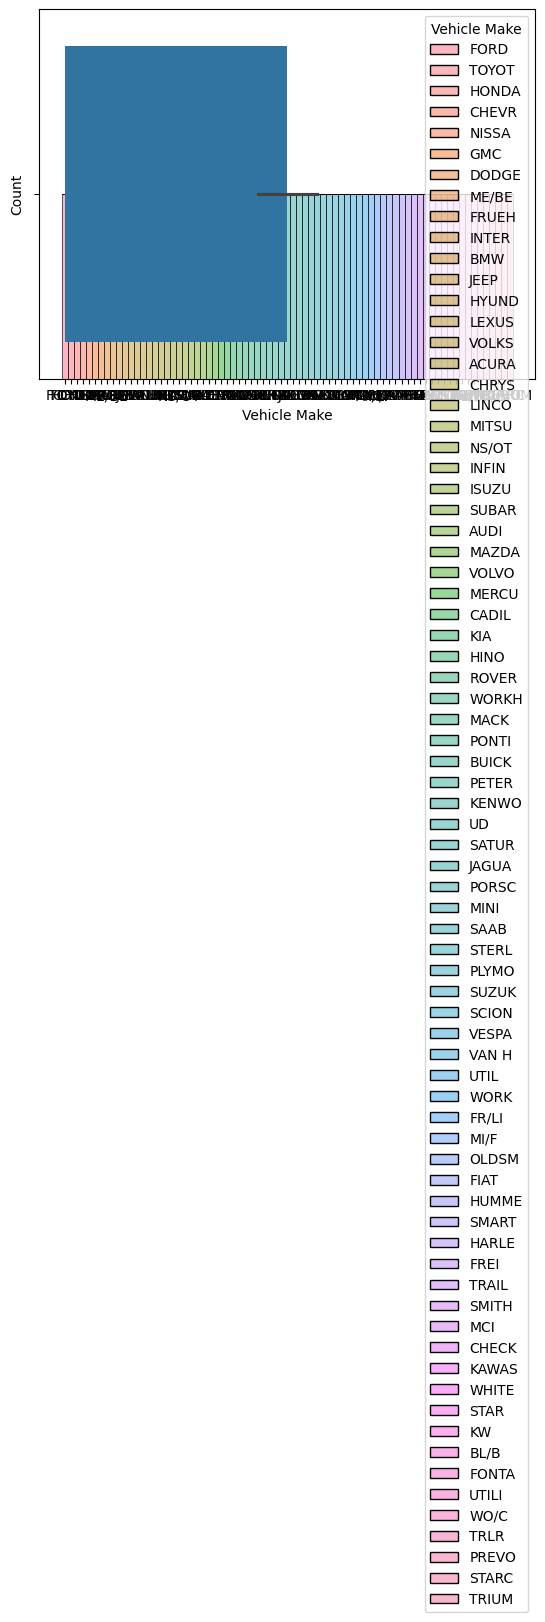

In [195]:
sns.histplot(data=df20, x="Vehicle Make", hue="Vehicle Make", multiple="layer")

sns.barplot(data=df20, x="Vehicle Make")

TypeError: '>' not supported between instances of 'Axes' and 'int'

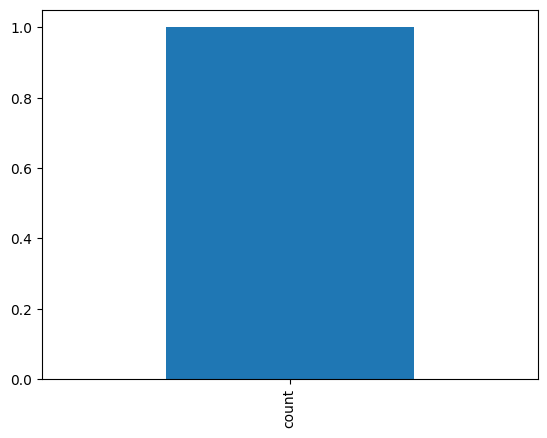

In [137]:
df44["Vehicle Make"]=mas[mas[["count"]]>=2].dropna().count().plot(kind="bar")

df[["Vehicle Make"]].value_counts()


# print(df44[["Vehicle Make"]][(df44["Vehicle Make"] >1)].value_counts())

# (df44["Vehicle Make"] >1).value_counts()
pd.DataFrame((df44[["Vehicle Make"]][(df44["Vehicle Make"] >1)].value_counts()))



### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [56]:

# print(len(df["Vehicle Color"].value_counts()))
# df["Vehicle Color"].value_counts()
df6=df


df6["Vehicle Color"]=df6["Vehicle Color"].replace(["W","WH","WH/","WT","WHI","WTH","WHT","WHR","WHIT"],"WHITE")#funciona
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GY","GY/","GRY","GYGY","GRAY","GY-GY"],"GREY")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BK","BL","BLK","BKJ","BKACK","BLK/B"],"BLACK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["SL","SLV","SIL","SILVE","SILV","SLVR","SILVR",],"SILVER")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BN","BR","BRN","BRW","BROW"],"BROWN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["YL","YW","BUS","YEL","YELOW","YELLO"],"YELLOW")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GD","GL","GN","GLD"],"GOLDEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["R","RD","RD/","RB"],"RED")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GR","GREN","GN","GRN"],"GREEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["OR","TN","TNGR","TEN","TAN","ORANG"],"ORANGE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BLU","TOPAZ"],"BLUE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["PR","PUR","PURPL"],"PURPLE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["MR","MAROO"],"MAROON")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GYT","GRT","GYTN"],"GREY-TANGERINE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GYBR"],"GREY-BROWN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GYW",],"GREY-WHITE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GRG",],"GREY-GOLDEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKGY"],"DARK-GREY")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKG"],"DARK-GREEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKR"],"DARK-RED")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKB"],"DARK-BROWN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKBL"],"DARK-BLACK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LTB","LTBL"],"LIGHT-BLACK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LTP"],"LIGHT-PURPLE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LTG"],"LIGHT-GREEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LTGY"],"LIGHT-GREY")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BLGY"],"BLACK-GREY")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BLG"],"BLACK-GREEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BKBR"],"BLACK-BROWN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BK-RD"],"BLACK-RED")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["WH-BL"],"WHITE-BLACK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["NOC","NOCL"],"NO COLOUR")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BURG","BG"],"BURGER COLOUR")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DK/"],"DARK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LT","LT/"],"LITE COLOUR")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["UNKNO"],"UNKNOWN")

pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_rows', None)

print(df6["Vehicle Color"].value_counts())
# print(df6[df6.isnull().any(axis=1)].head()) # Aquí las filas con NaN
# print(df6[df6[["Vehicle Color"]].isnull()]) # Aquí las filas con NaN


# df6["Vehicle Color"].isnull().sum().sum() # Todavía hay valores NaN
# print(df6)


# Aqui consigo borrar los NaN del 
df77=df[["Vehicle Color"]]
df77


df77.dropna(how="all",inplace=True)

print(df77[df77.isnull().any(axis=1)]) # Aquí las filas con NaN
df77["Vehicle Color"].isnull().sum().sum() # Todavía hay valores NaN

print(df77)

Vehicle Color
WHITE          2920
BLACK          2359
GREY           1874
RED             570
BROWN           405
               ... 
B                 1
DARK-GREY         1
GREY-WHITE        1
BUY               1
BLACK-BROWN       1
Name: count, Length: 44, dtype: int64
Empty DataFrame
Columns: [Vehicle Color]
Index: []
     Vehicle Color
0            WHITE
1            BLACK
3             GREY
4           MAROON
5             GREY
...            ...
9995         WHITE
9996         BLACK
9997         GREEN
9998        SILVER
9999         BLACK

[9931 rows x 1 columns]


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16792\1405779586.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df77.dropna(how="all",inplace=True)


OptionError: Pattern matched multiple keys

In [ ]:
# pd.set_option('display.max_rows', None)
# print(df6.isnull().sum()) # para saber cuantos NAN hay por columan en el DF. Al haber tantas columans no permite visualizar bien

# df6.isnull().sum().sum() # Se suman todos los NAN que hay en el DF

df6["Vehicle Color"].isnull().sum().sum() # Se suman todos los NAN que hay en el DF


69

### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

In [ ]:
df77=df[["Vehicle Color","Vehicle Make"]]
df77.isnull().sum().sum() # Todavía hay valores NaN

df8=df77.dropna()

df8.shape

(9859, 2)

<Axes: xlabel='Vehicle Make', ylabel='Vehicle Color'>

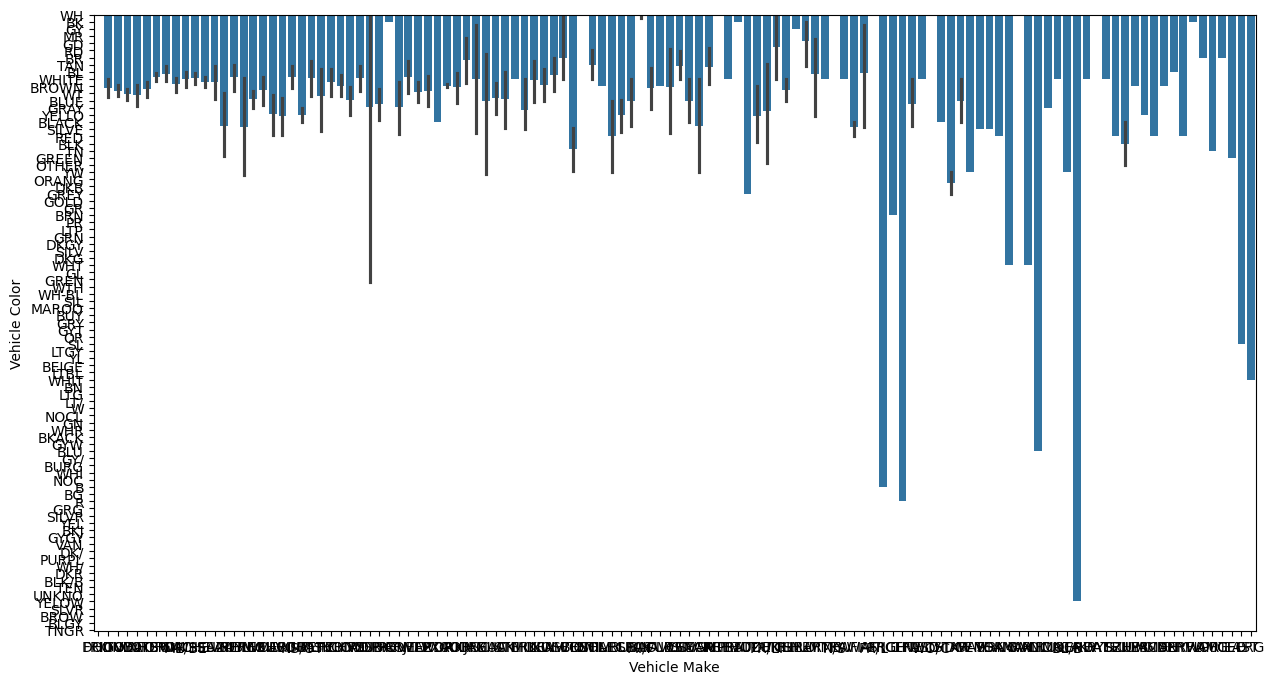

In [50]:
fig, ax = plt.subplots(figsize=(15, 8)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=df,x="Vehicle Make", y="Vehicle Color", hue=None)

### Me quedo con este

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119],
 [Text(0, 0, 'FRIG'),
  Text(0, 1, 'DODGE'),
  Text(0, 2, 'HONDA'),
  Text(0, 3, 'TOYOT'),
  Text(0, 4, 'VOLKS'),
  Text(0, 5, 'INTER'),
  Text(0, 6, 'FORD'),
  Text(0, 7, 'BMW'),
  Text(0, 8, 'GMC'),
  Text(0, 9, 'ME/BE'),
  Text(0, 10, 'NISSA'),
  Text(0, 11, 'CHEVR'

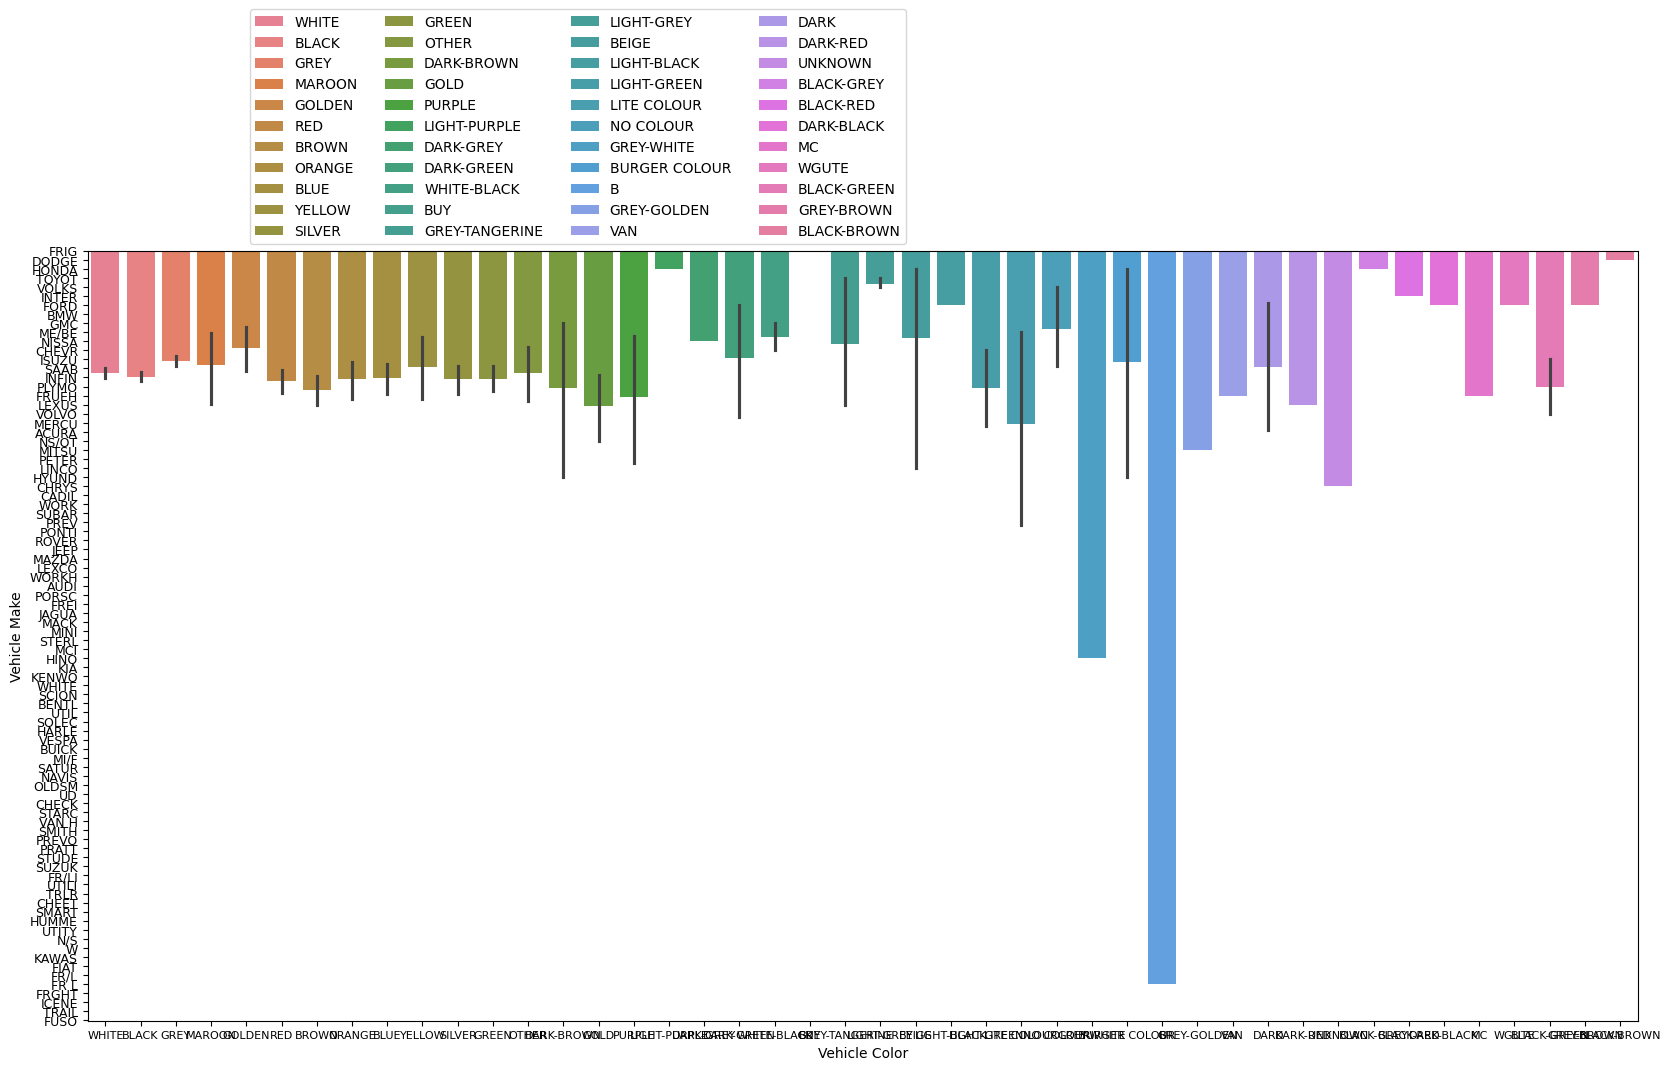

In [ ]:
plt.subplots(figsize=(20, 10)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=df6,x="Vehicle Color", y="Vehicle Make", hue="Vehicle Color")
plt.legend(bbox_to_anchor=(0.1, 1), ncol=4)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

<Axes: xlabel='Vehicle Make', ylabel='Count'>

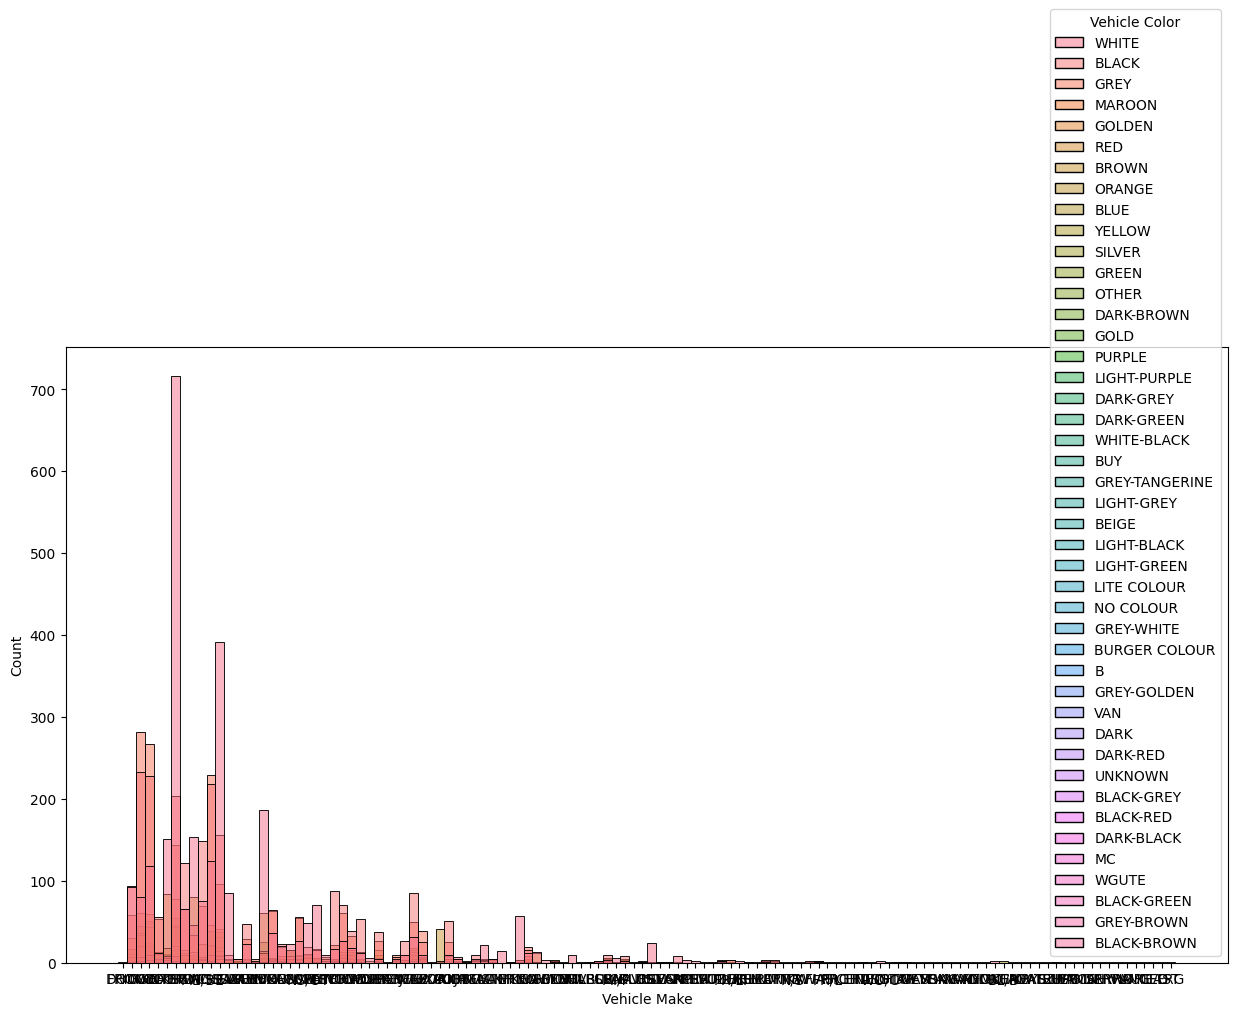

In [60]:
fig, ax = plt.subplots(figsize=(15, 8)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.histplot(data=df6, x="Vehicle Make", hue="Vehicle Color")


<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

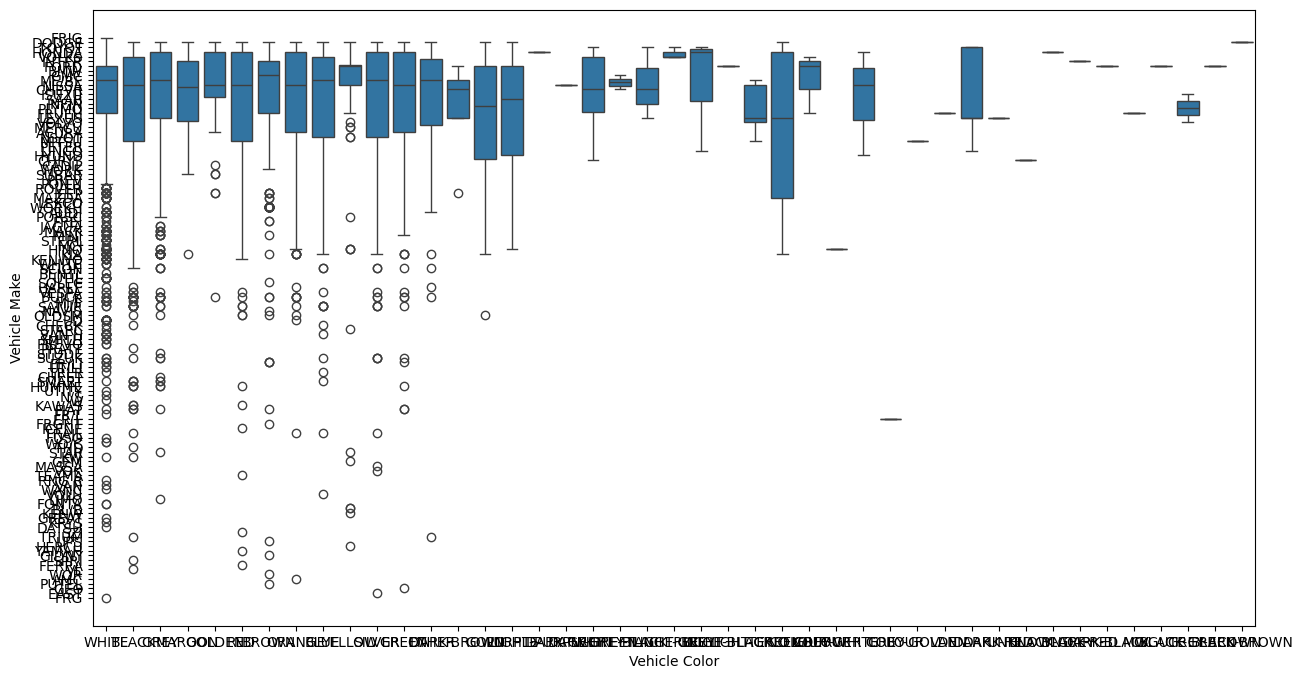

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8)) # Establim el marc de dibuix-> Sin esto dibuja el gráfico pero algo apiñado
sns.boxplot(data=df8,x="Vehicle Color", y="Vehicle Make", hue=None)


<Axes: xlabel='Vehicle Make', ylabel='Vehicle Color'>

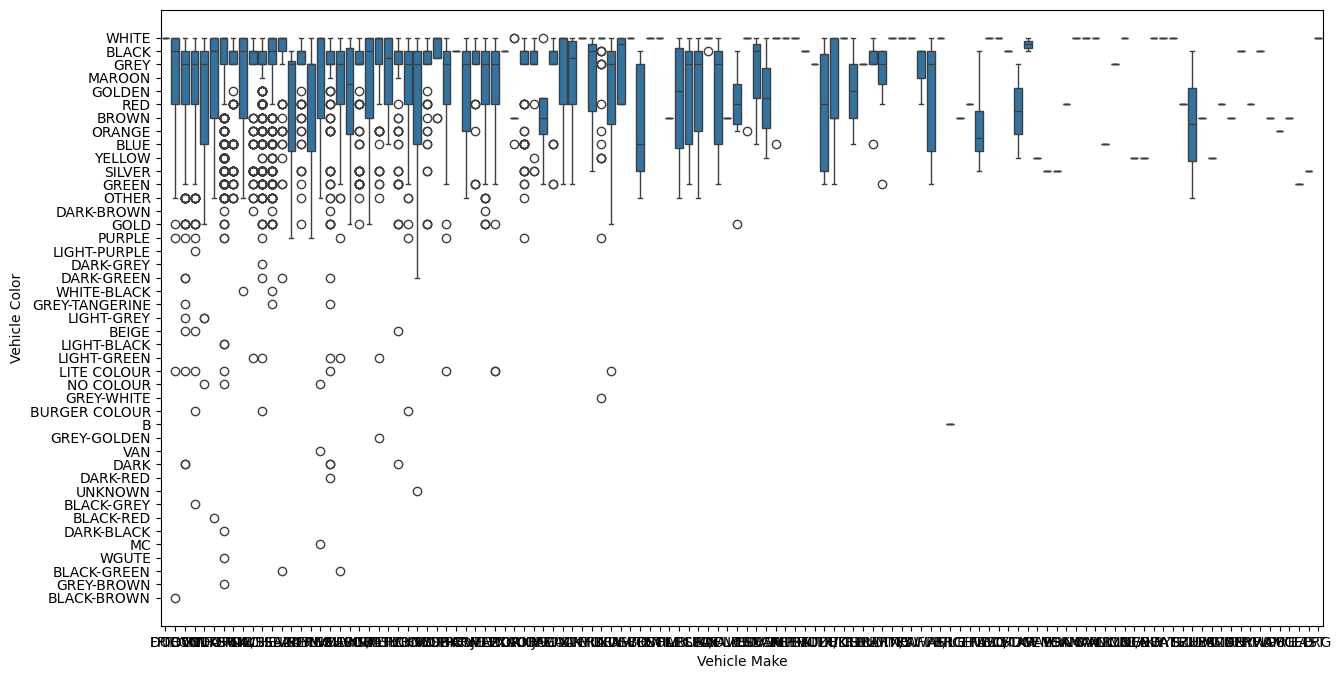

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.boxplot(data=df8,x="Vehicle Make", y="Vehicle Color", hue=None)

In [ ]:

df.columns

# # df["Vehicle Body Type"]
# pd.set_option("display.max_rows", None) 
# print(df["Vehicle Make"]).count

# print(df6["Vehicle Color"].value_counts())
# print(df6["Vehicle Make"].value_counts())
# print(df6.groupby["Vehicle Make"])

# (df6[["Vehicle Color","Vehicle Make"]].value_counts().dropna()).shape
# df66=df6[["Vehicle Color","Vehicle Make"]].dropna().shape

df6[["Vehicle Color","Vehicle Make"]].dropna().value_counts()


# df6[["Vehicle Color","Vehicle Make"]].dropna().value_counts().shape
# zas=(df6[["Vehicle Color","Vehicle Make"]].value_counts().dropna()) # Es una serie

# # pd.DataFrame(zas)

# zas=pd.DataFrame((df6[["Vehicle Color","Vehicle Make"]].value_counts())) # De Serie la transformo a DataFrame


zas2=pd.DataFrame(df6[["Vehicle Color","Vehicle Make"]].dropna().value_counts())

df6[["Vehicle Color","Vehicle Make"]].dropna().value_counts()


Vehicle Color   Vehicle Make
WHITE           FORD            716
                CHEVR           392
GREY            HONDA           281
                TOYOT           267
BLACK           HONDA           233
GREY            NISSA           229
BLACK           TOYOT           228
                NISSA           218
                FORD            203
WHITE           FRUEH           187
BLACK           CHEVR           156
WHITE           GMC             154
                INTER           151
BLACK           ME/BE           148
GREY            FORD            144
WHITE           NISSA           124
BLACK           BMW             122
WHITE           TOYOT           118
GREY            CHEVR            96
BLACK           DODGE            94
WHITE           DODGE            93
BLACK           LINCO            87
WHITE           ISUZU            85
BLACK           JEEP             85
BROWN           INTER            84
WHITE           HONDA            80
BROWN           GMC              80

<Axes: xlabel='Vehicle Make', ylabel='Vehicle Color'>

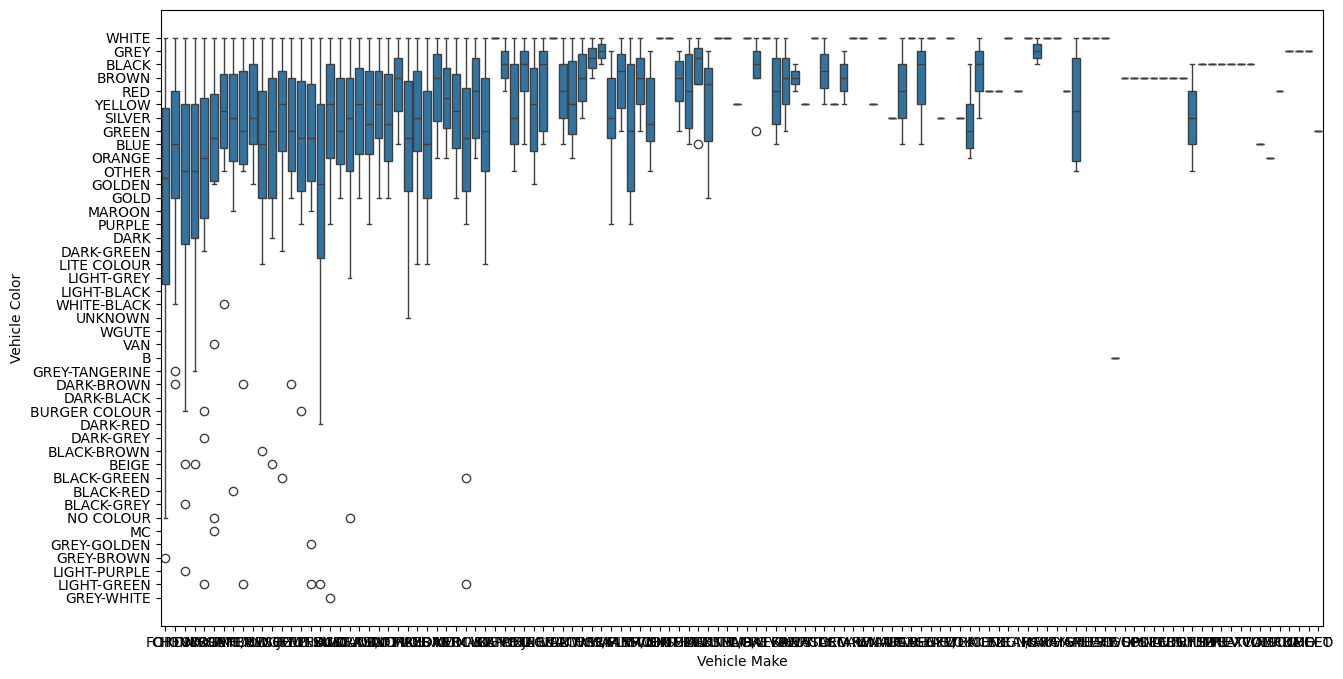

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.boxplot(data=zas,x="Vehicle Make", y="Vehicle Color", hue=None)

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

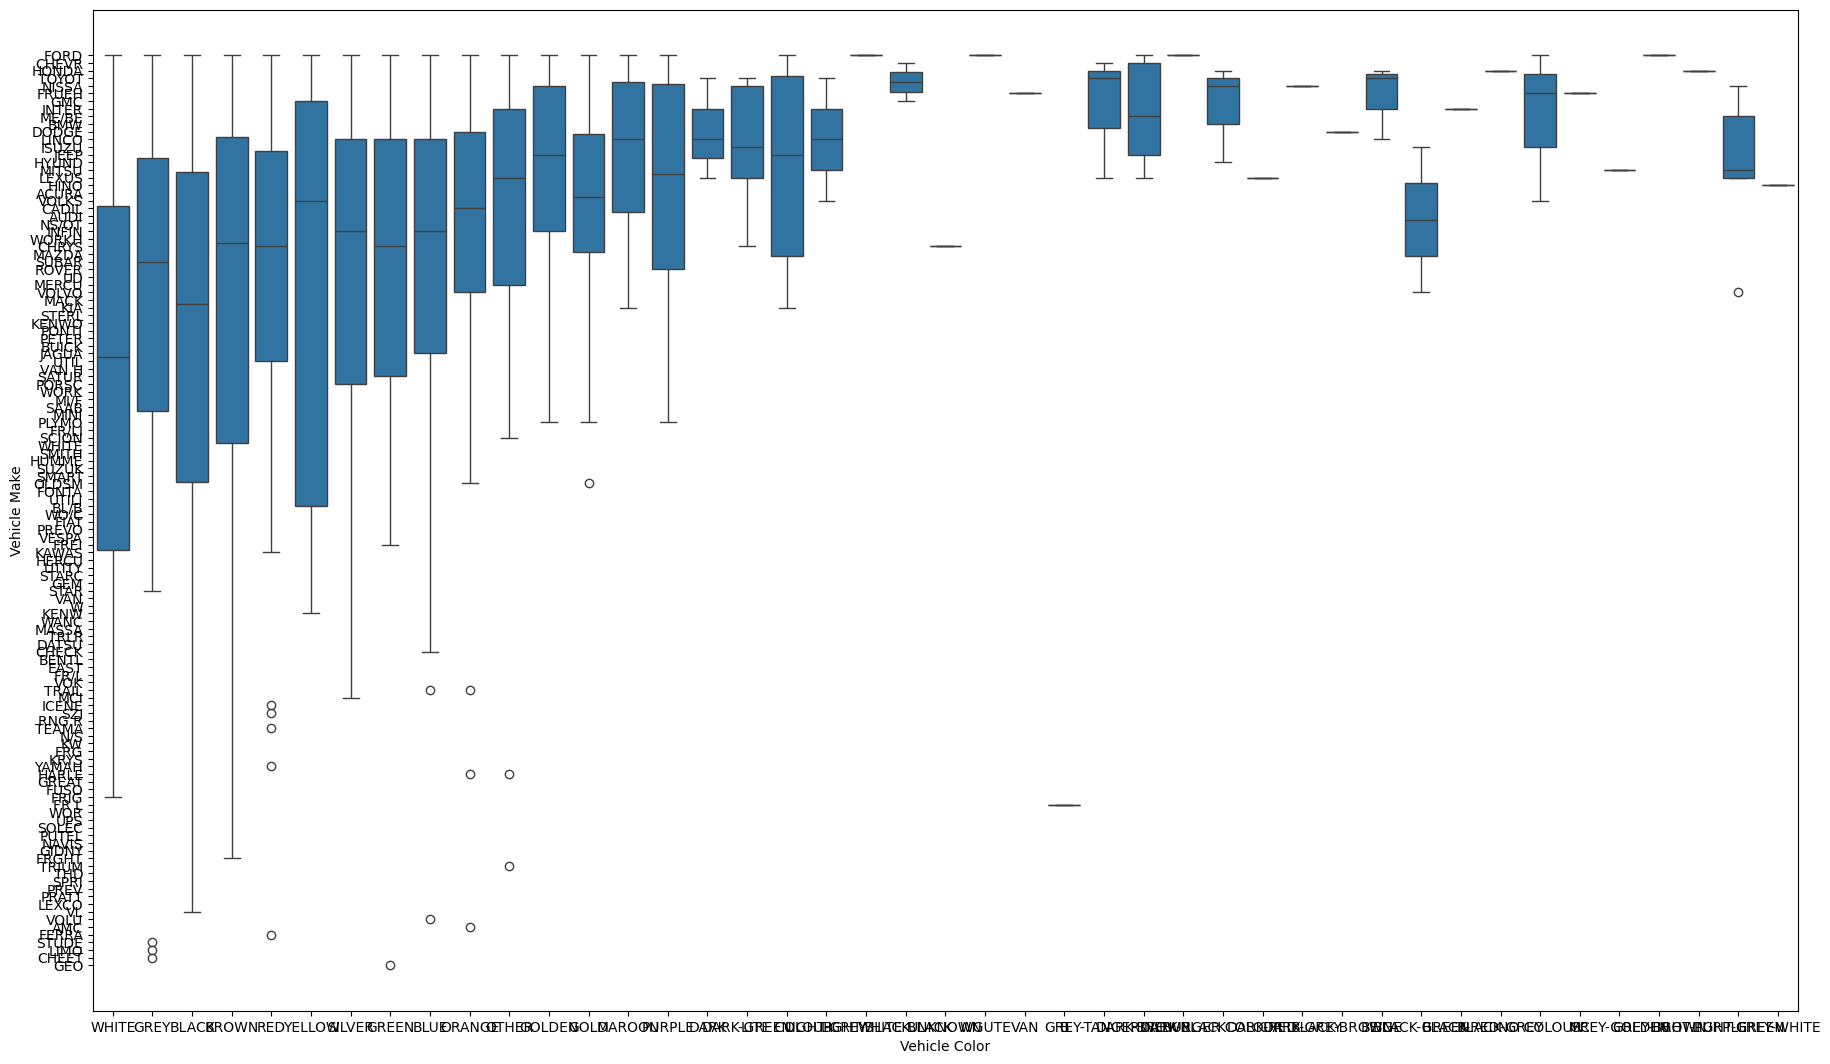

In [ ]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.boxplot(data=zas2,x="Vehicle Color", y="Vehicle Make", hue=None)

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

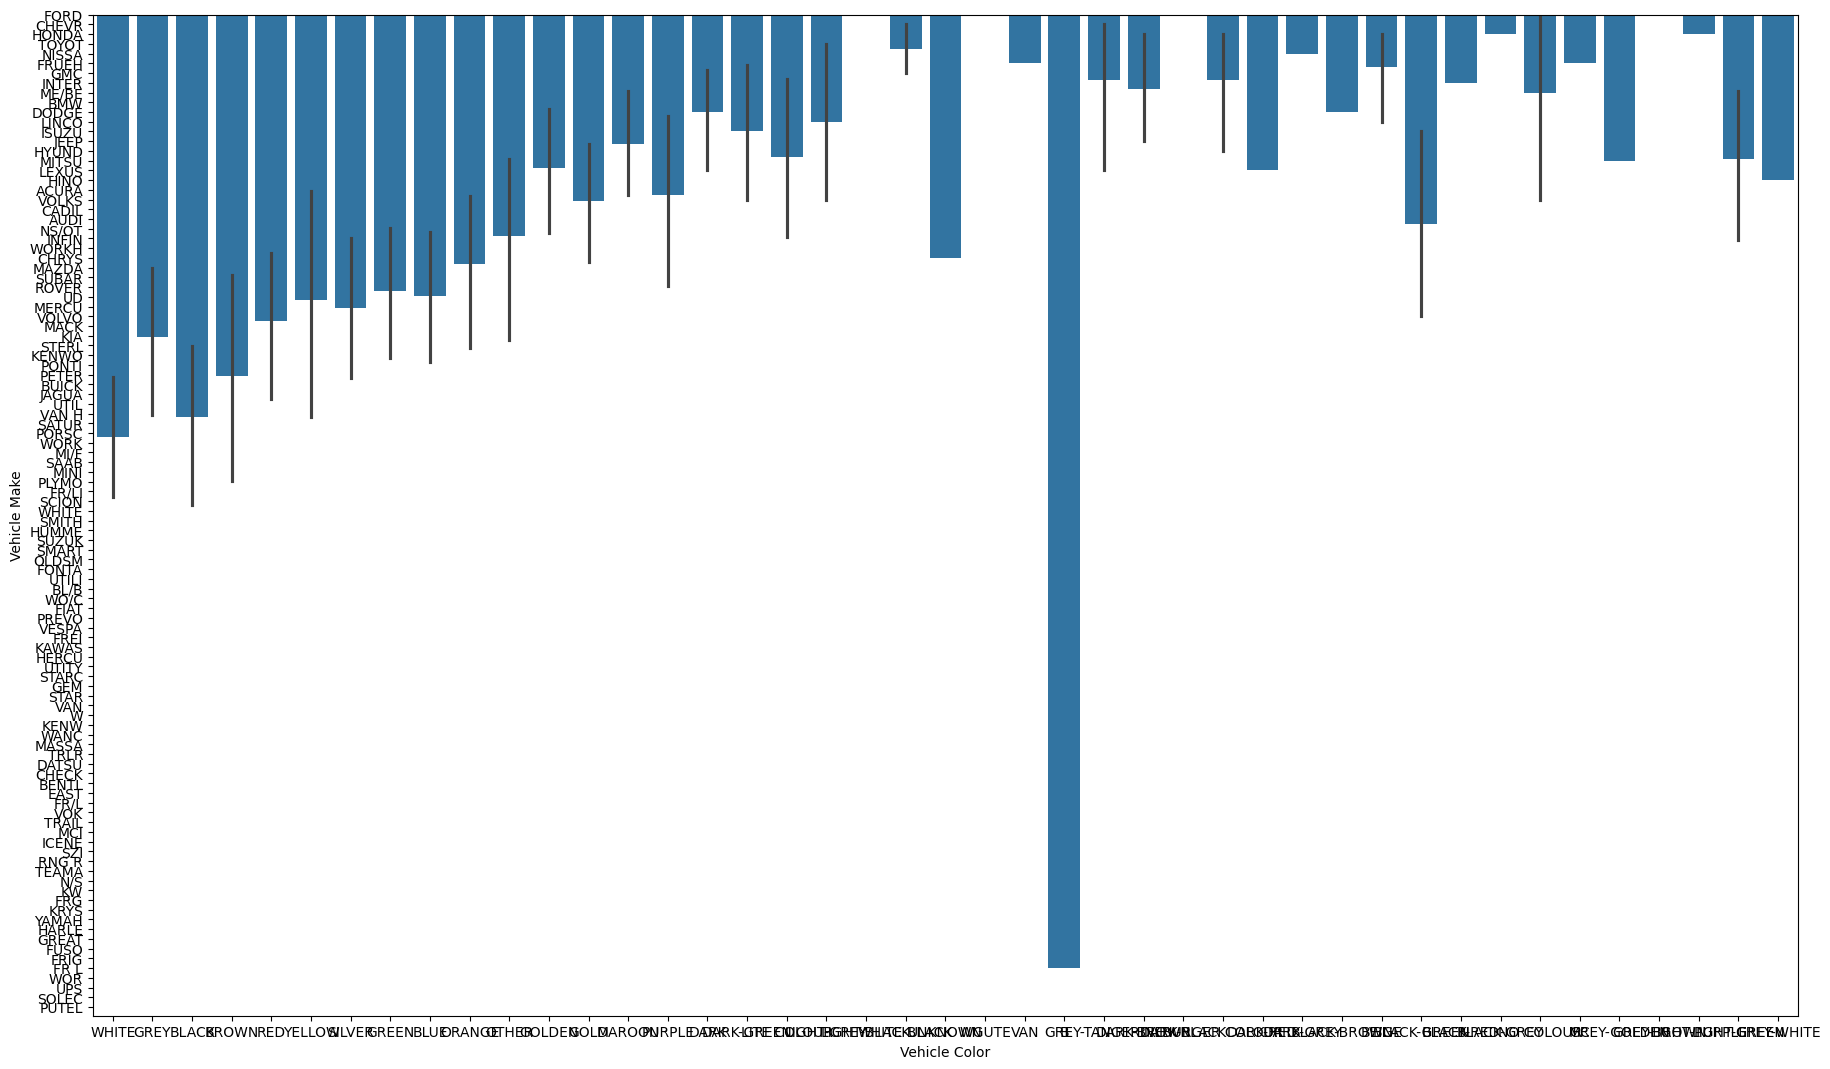

In [ ]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=zas2,x="Vehicle Color", y="Vehicle Make", hue=None)

<Axes: xlabel='Vehicle Make', ylabel='Vehicle Color'>

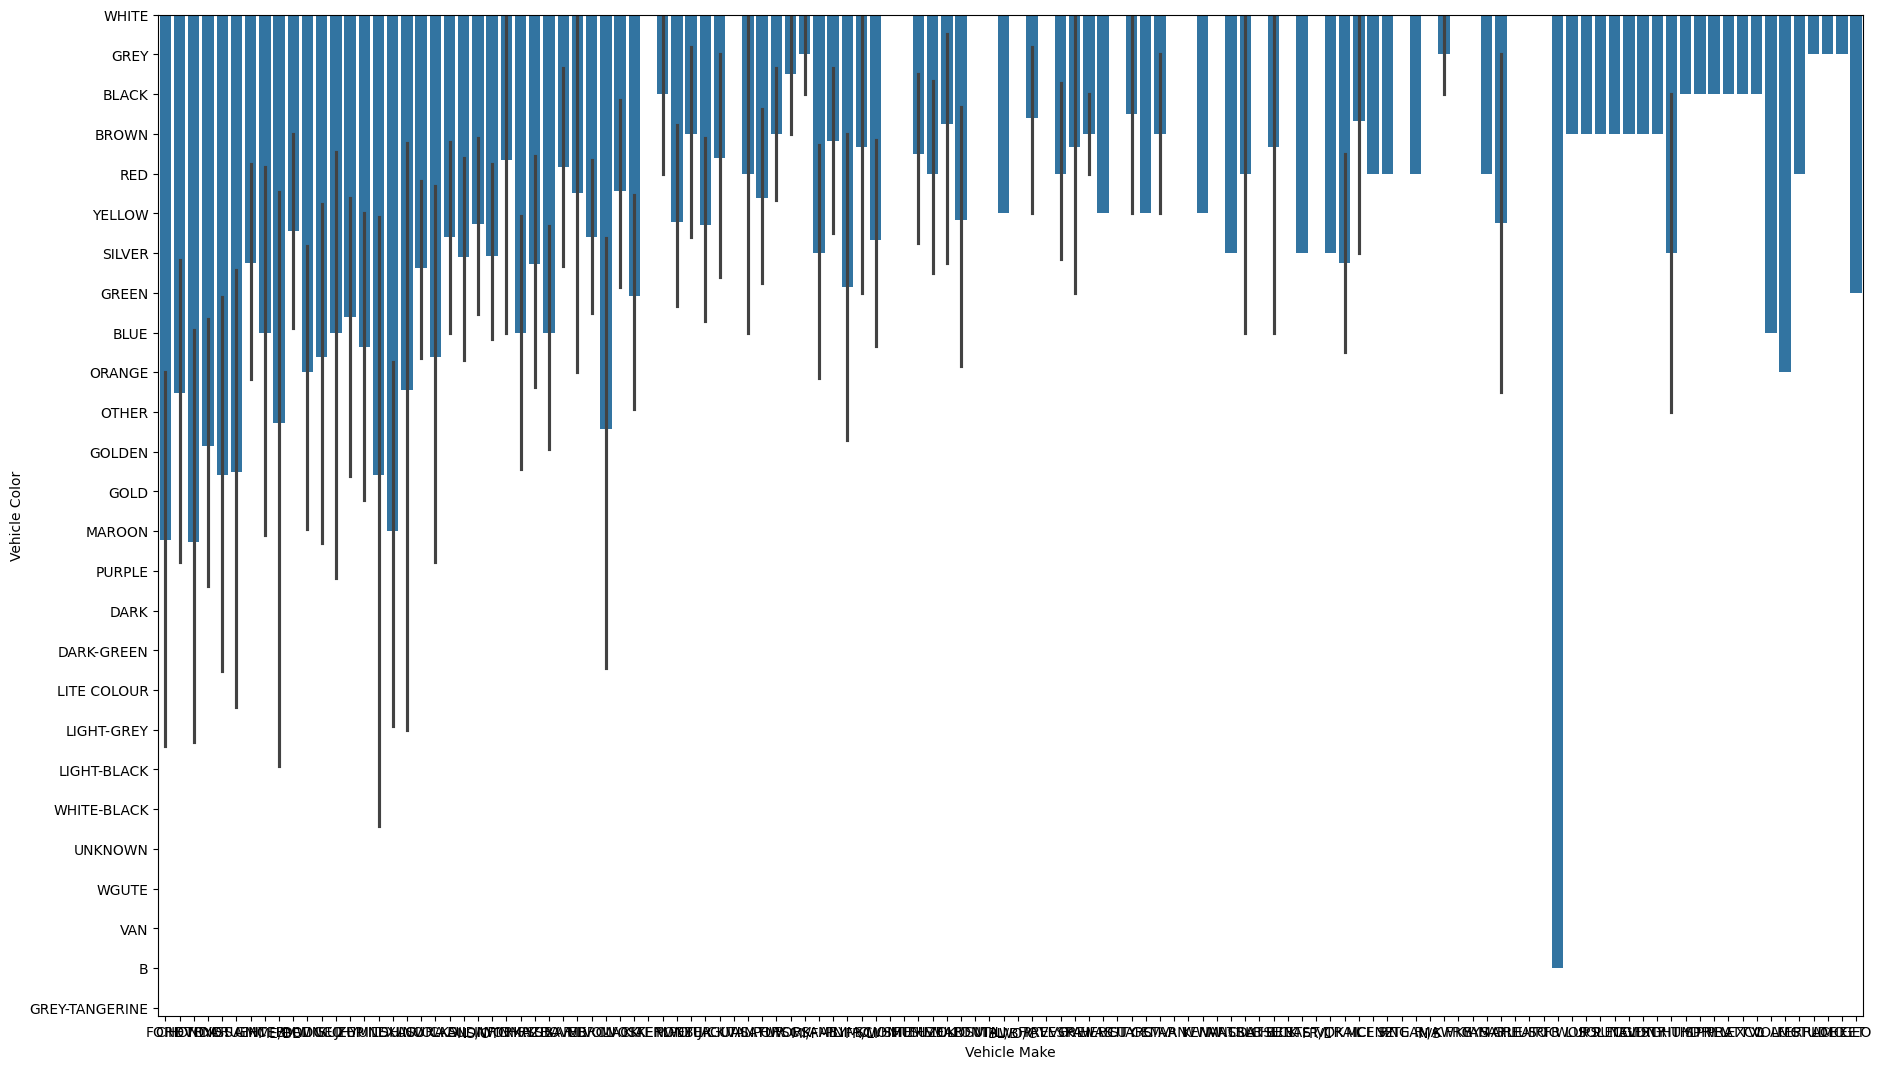

In [ ]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=zas2,x="Vehicle Make", y="Vehicle Color", hue=None)

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

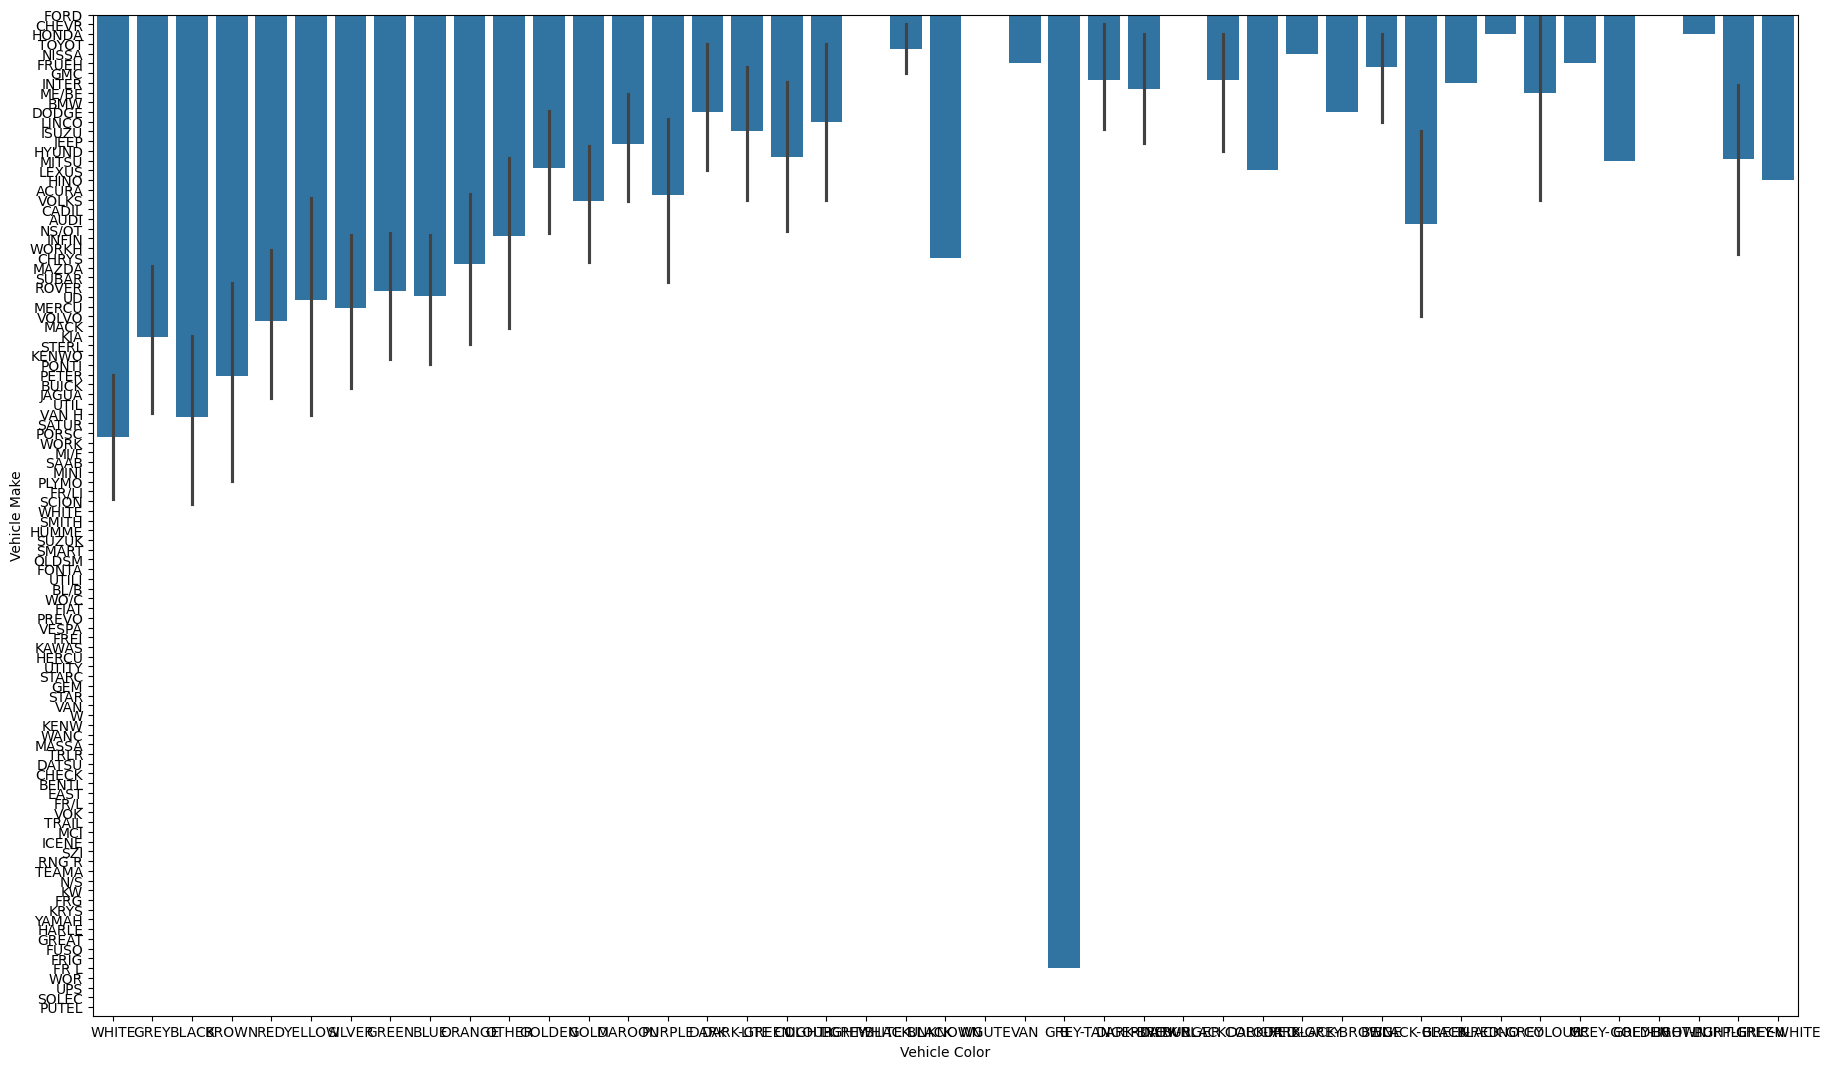

In [ ]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=zas,x="Vehicle Color", y="Vehicle Make", hue=None)

<Axes: xlabel='Vehicle Make', ylabel='Vehicle Color'>

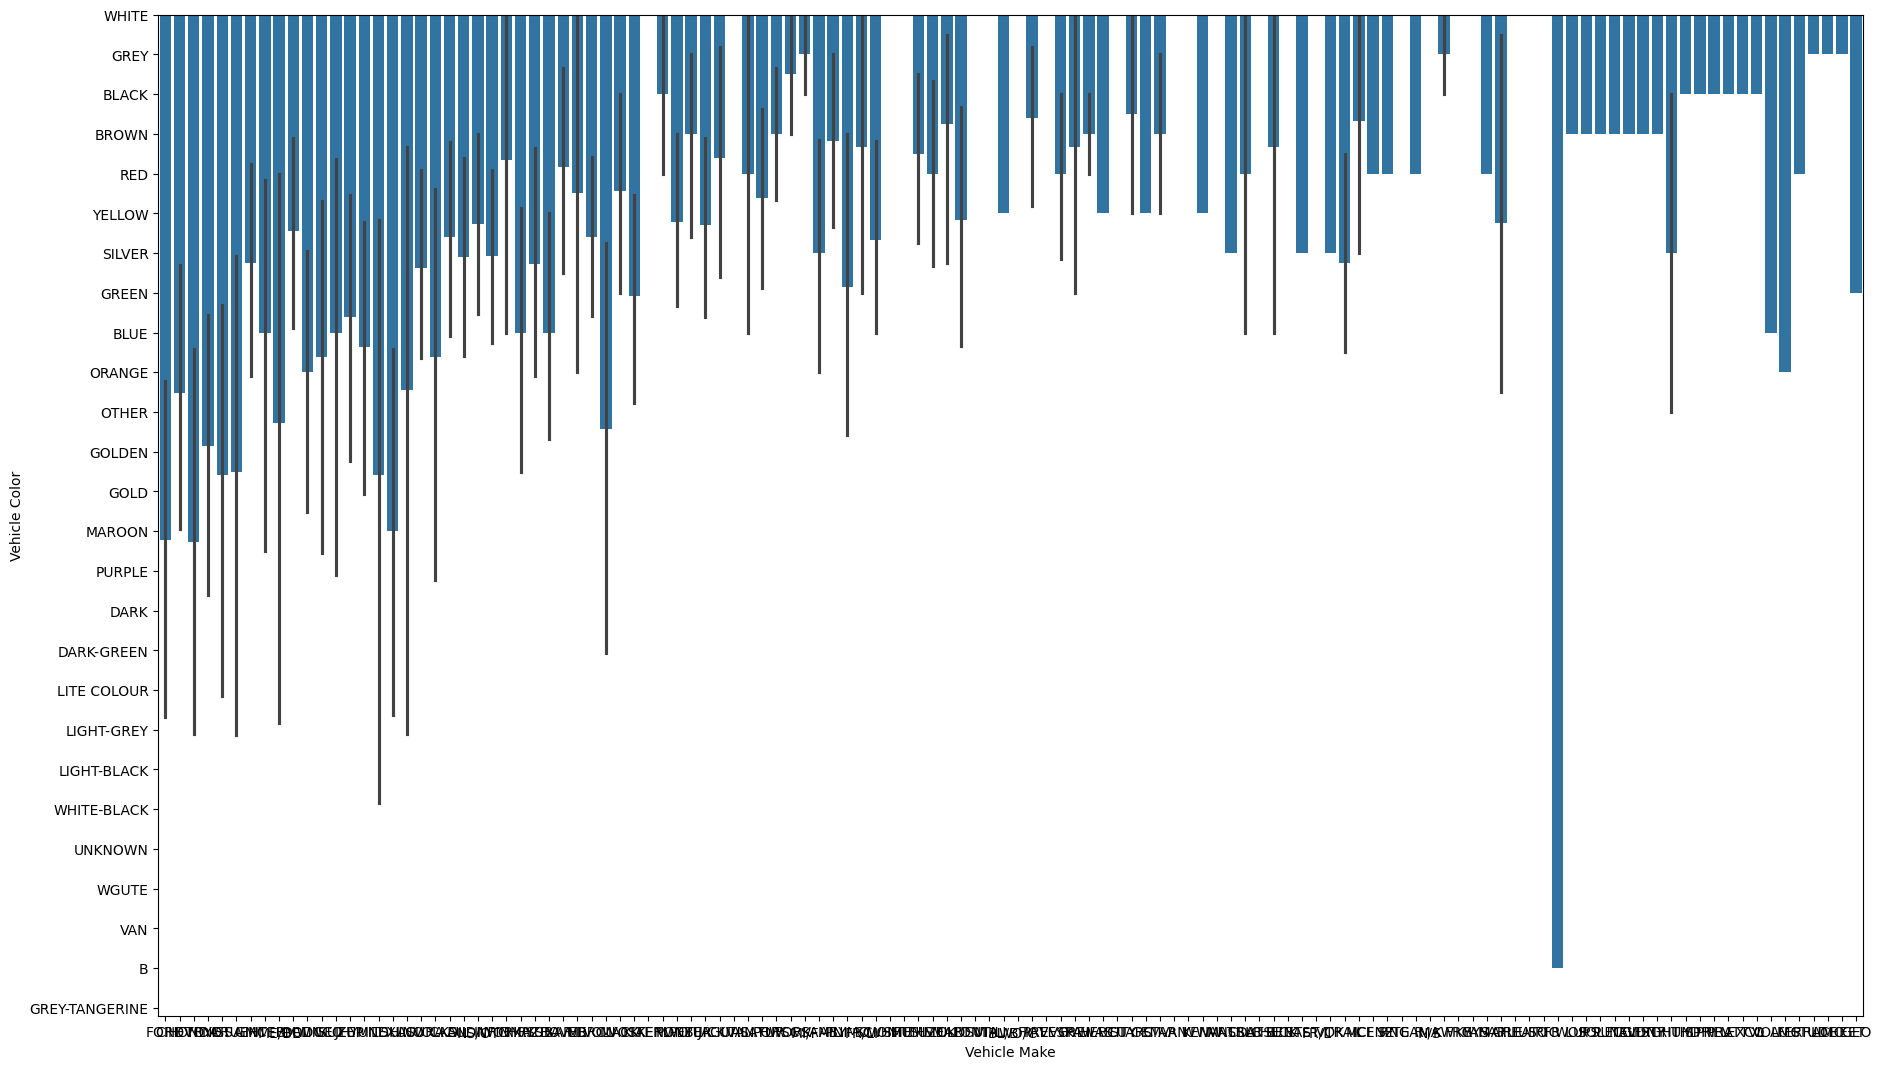

In [ ]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=zas,x="Vehicle Make", y="Vehicle Color", hue=None)

c:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


<Axes: xlabel='Vehicle Color', ylabel='Count'>

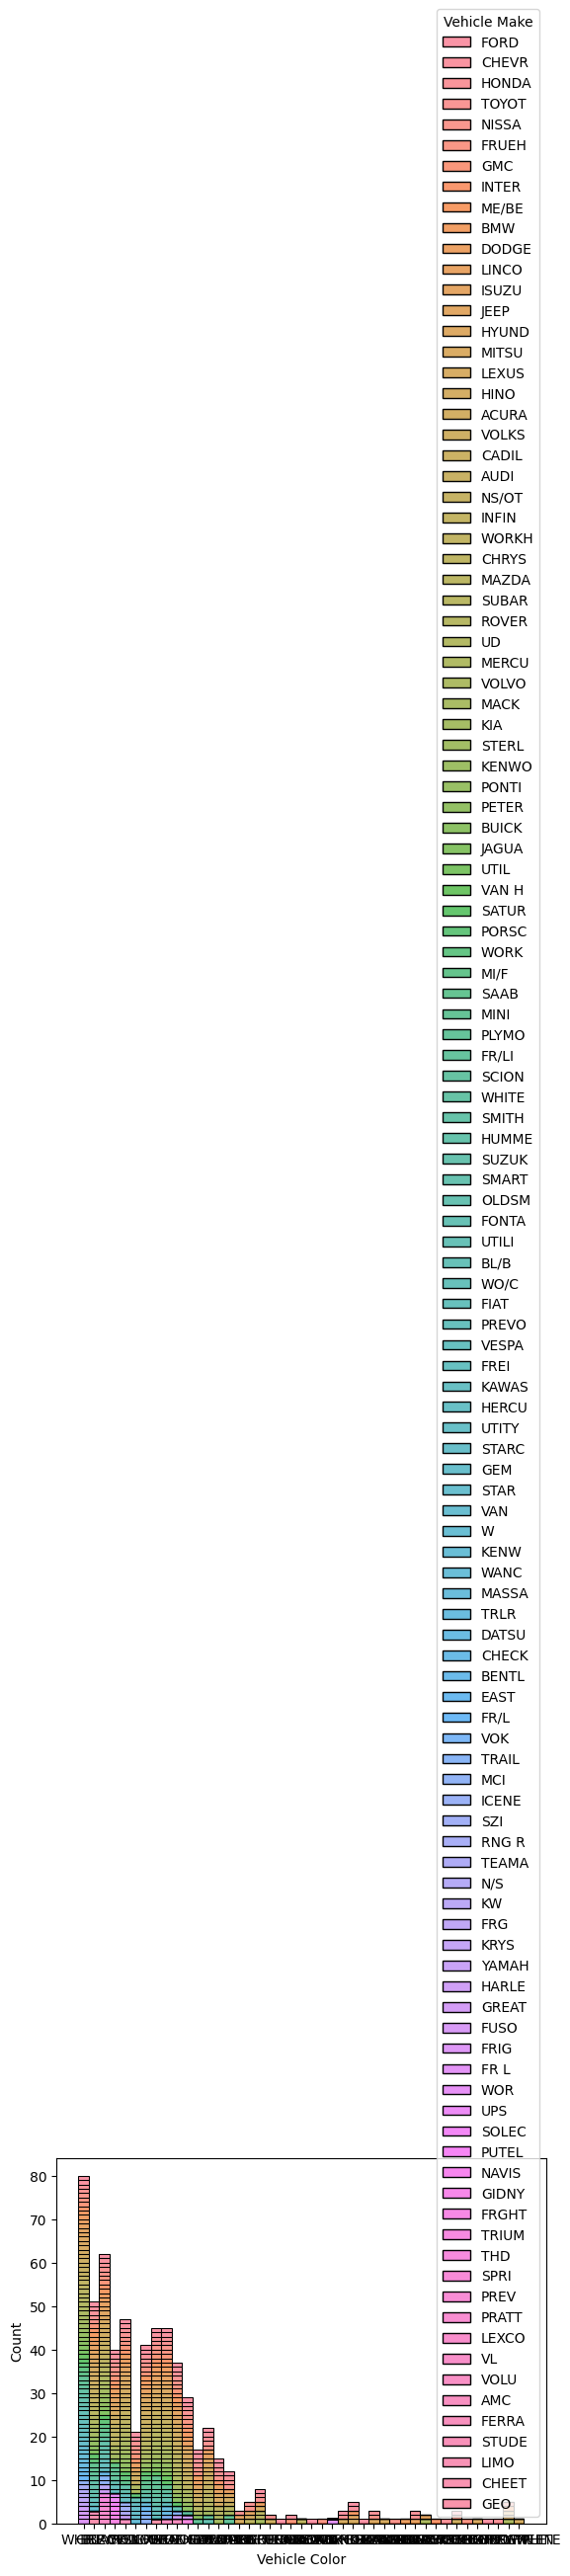

In [ ]:
# sns.countplot(zas2, x="Vehicle Color", hue="Vehicle Make")
# sns.histplot(data=penguins, y="flipper_length_mm")

sns.histplot(data=zas2, x="Vehicle Color", hue="Vehicle Make", multiple="stack")


<Axes: xlabel='Vehicle Color', ylabel='Count'>

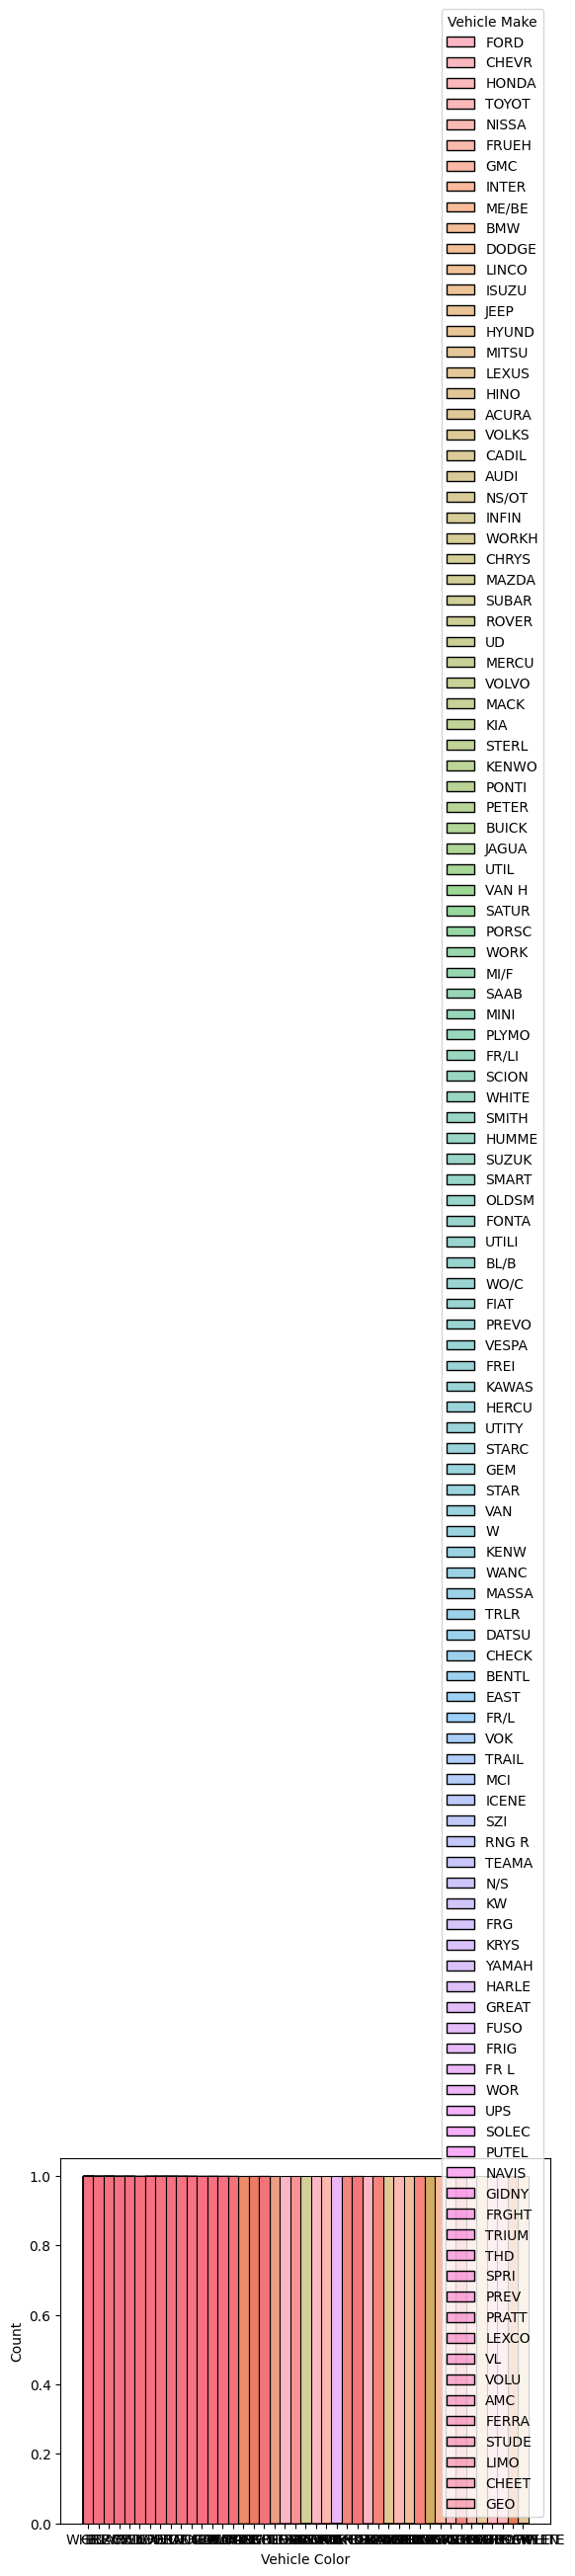

In [ ]:
sns.histplot(data=zas2, x="Vehicle Color", hue="Vehicle Make")


<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

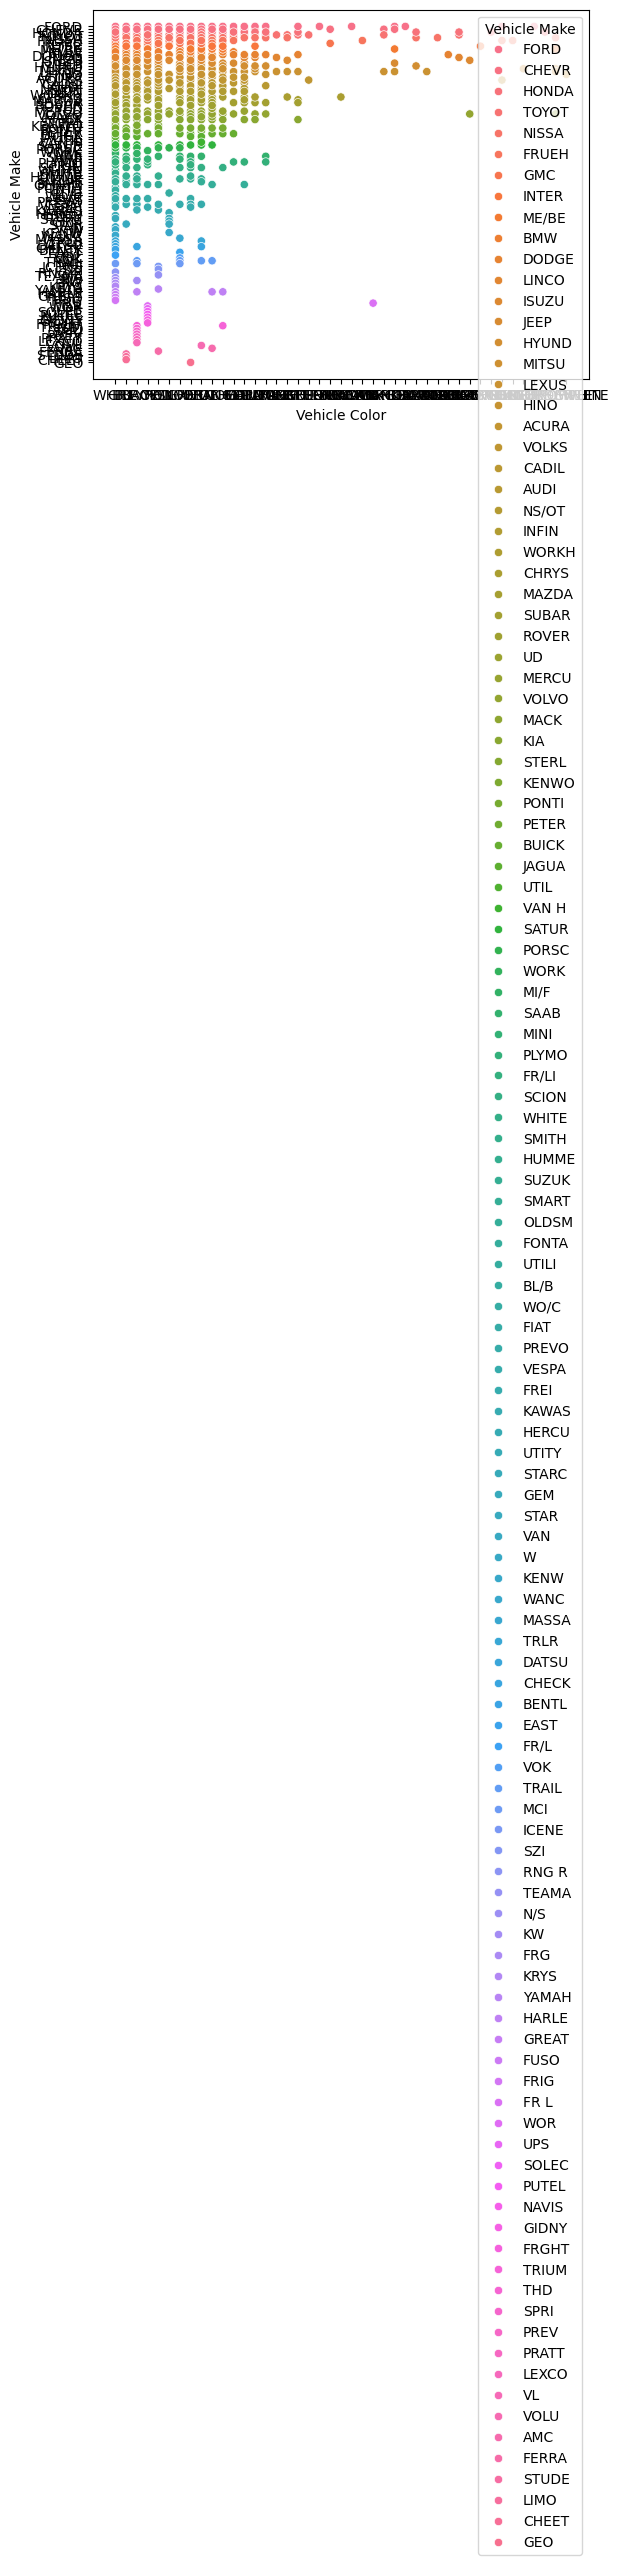

In [ ]:
# sns.kdeplot(data=zas2, x="Vehicle Color", hue="Vehicle Make",multiple="fill")

sns.scatterplot(data=zas2, x="Vehicle Color", y="Vehicle Make", hue="Vehicle Make")

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

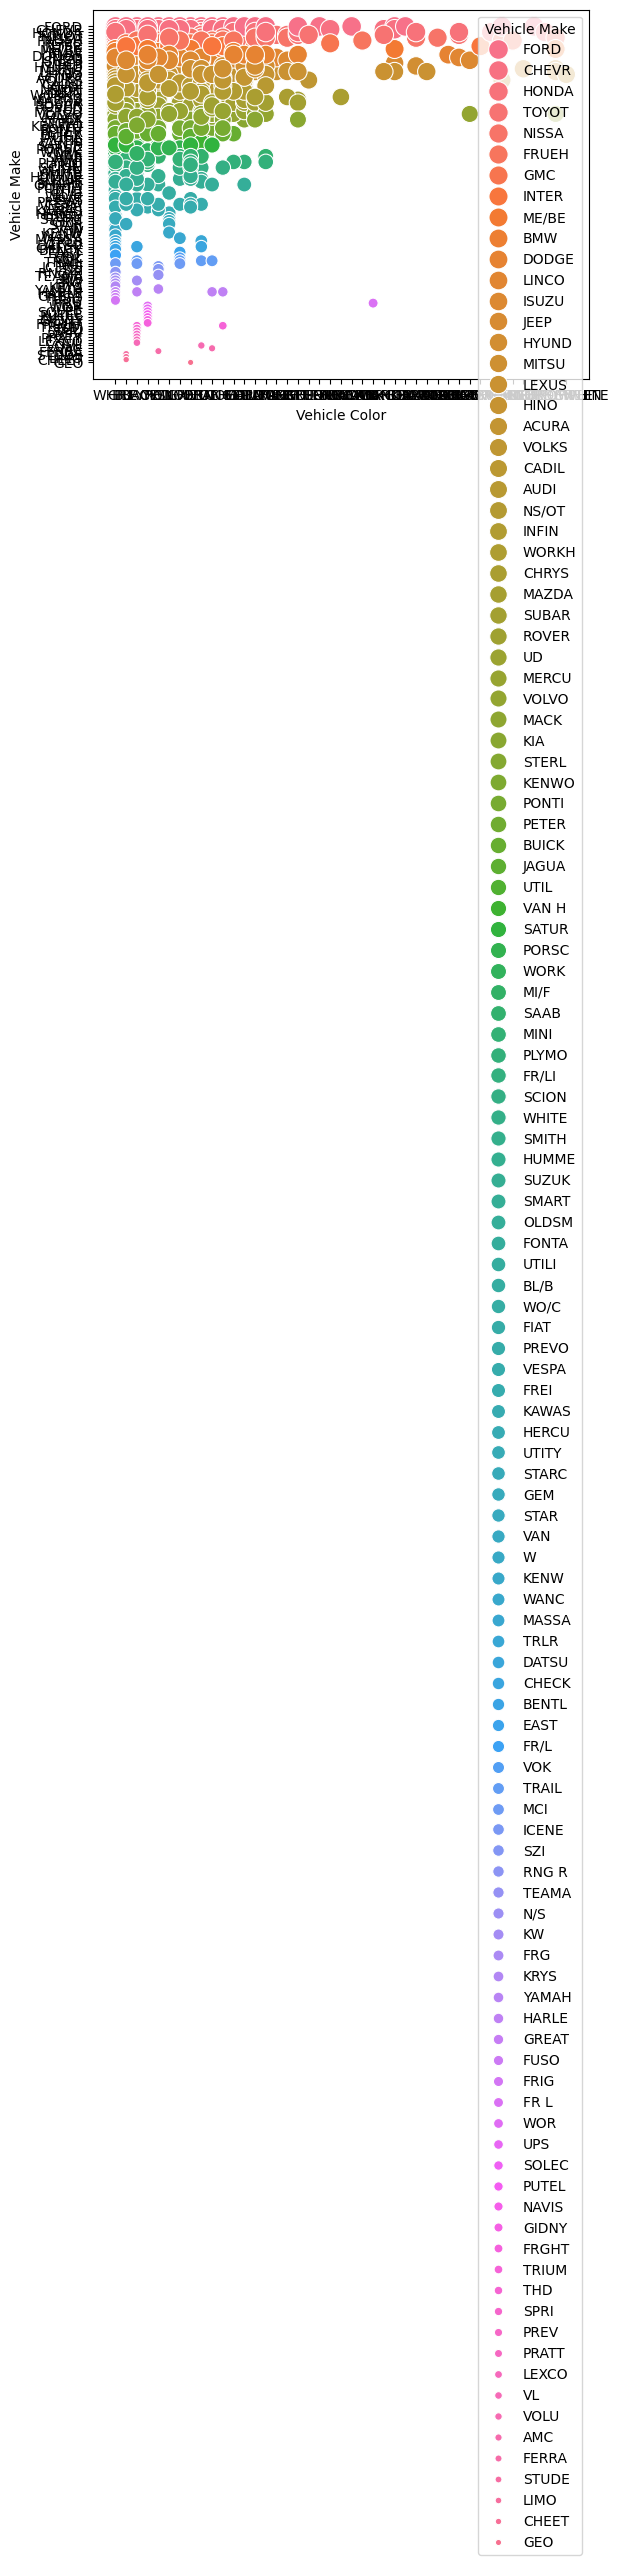

In [ ]:
sns.scatterplot(
    data=zas2, x="Vehicle Color", y="Vehicle Make", hue="Vehicle Make", size="Vehicle Make",
    sizes=(20, 200), legend="full"
)


# sns.scatterplot(data=zas2, x="Vehicle Color", y="Vehicle Make", hue="Vehicle Make")


<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

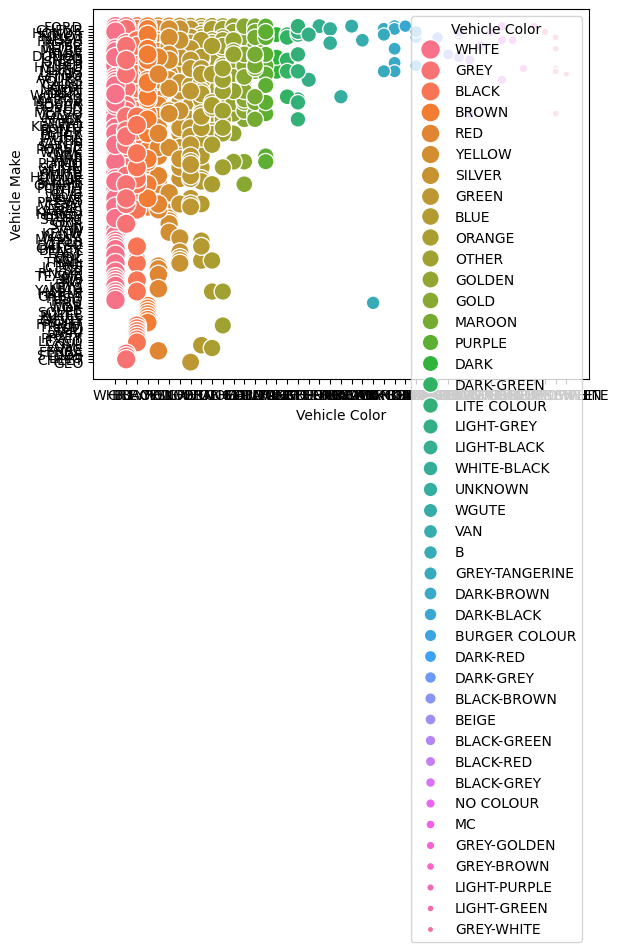

In [ ]:
sns.scatterplot(
    data=zas2, x="Vehicle Color", y="Vehicle Make", hue="Vehicle Color", size="Vehicle Color",
    sizes=(20, 200), legend="full"
)

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

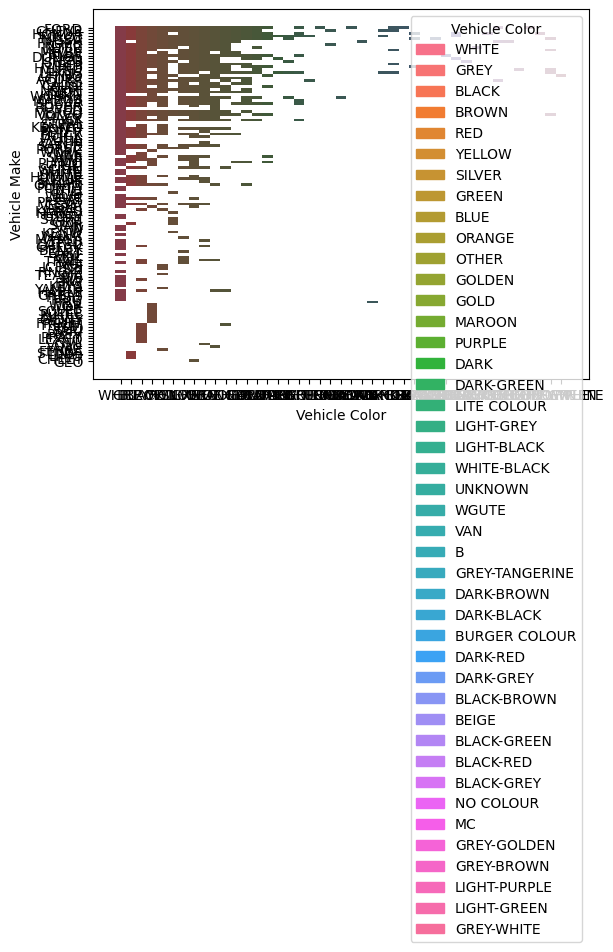

In [ ]:
sns.histplot(data=zas2, x="Vehicle Color", y="Vehicle Make",hue="Vehicle Color")

### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [10]:
df9=df

# df[["Issue Date","Violation Code"]]
# df.index = DatetimeIndex(df["date"])

df9.index = DatetimeIndex(df["Issue Date"])

df9.sort_index(inplace=True) # para ordenar los datos, Dice que sin esto no funciona,
#  yo lo he hecho sin usar esto pero caundo quieres añadir df.loc["2014":"2019"] no te deja porque los datos tienen que estar ordenados

df9 = df9.drop(columns="Issue Date") # Solo funciona 1 vez, luego hay que resetar el df

df9.shape

# df9.head(50)
# df9[["Issue Date","Violation Code"]] # al quitarle la dropna Issue Date, ya no existe como columna y solo existe Issue Data como fila
df9[["Violation Code"]].head(5)


Violation Code
Issue Date                
2000-12-24              14
2012-03-03              20
2012-10-11              46
2012-10-30              19
2013-01-02              14

In [ ]:
# (df9[["Violation Code"]].resample('M').nunique()) # Asi le quito el 0 a todas las filas
(df9[["Violation Code"]].resample('M').agg("count")) # Asi le quito el 0 a todas las filas

(df9[["Violation Code"]].resample('M').value_counts()) # Asi le quito el 0 a todas las filas

AttributeError: 'DatetimeIndexResampler' object has no attribute 'value_counts'

In [ ]:
(df9[["Violation Code"]].resample('M').count())
# (df9[["Violation Code"]].resample('M').nunique()) # Asi le quito el 0 a todas las filas



Violation Code
Issue Date                
2000-12-31               1
2001-01-31               0
2001-02-28               0
2001-03-31               0
2001-04-30               0
...                    ...
2013-01-31               4
2013-02-28               0
2013-03-31               0
2013-04-30               1
2013-05-31               0

[150 rows x 1 columns]

### J) Visualiza la anterior cuestión (I)

<Axes: xlabel='Violation Code', ylabel='Count'>

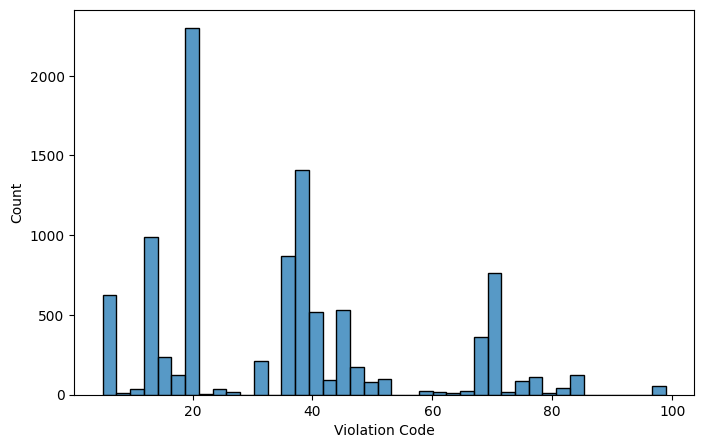

In [22]:
# (df9[["Violation Code"]].resample('M').count()) # Asi le quito el 0 a todas las filas

fig, ax = plt.subplots(figsize=(8,5)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado


sns.histplot(data=df9, x="Violation Code")


<Axes: xlabel='Violation Code', ylabel='Count'>

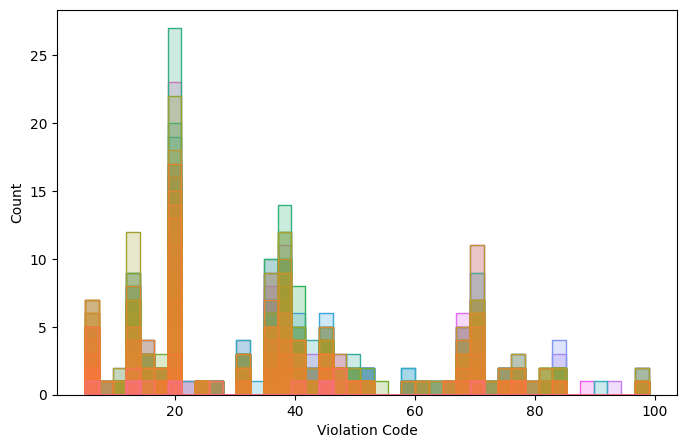

In [20]:
fig, ax = plt.subplots(figsize=(8,5)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado

sns.histplot(data=df9, x="Violation Code", hue="Issue Date", element="step",legend=False)

<Axes: xlabel='Violation Code', ylabel='Count'>

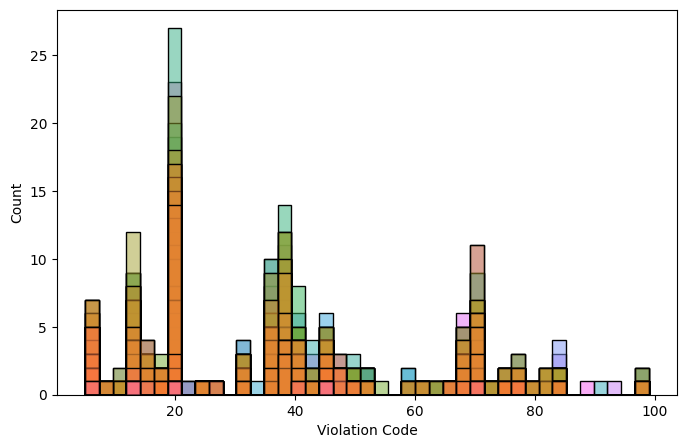

In [33]:
fig, ax = plt.subplots(figsize=(8,5)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.histplot(data=df9, x="Violation Code", hue="Issue Date", multiple="layer",legend=False)



c:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


<Axes: xlabel='Violation Code', ylabel='Count'>

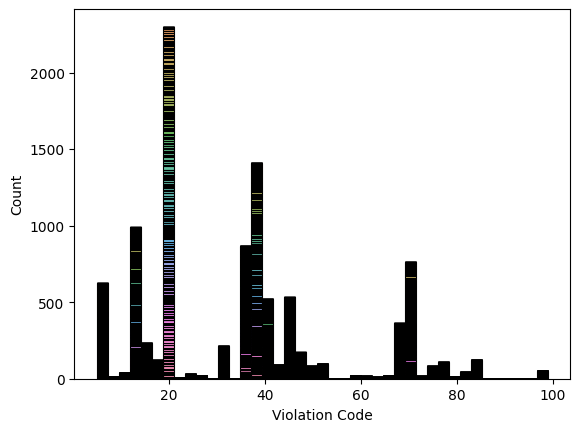

In [15]:
sns.histplot(data=df9, x="Violation Code", hue="Issue Date", multiple="stack",legend=False)

### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'